In [2]:
# Load dataset
import pandas as pd
df = pd.read_csv('anxiety.csv', encoding = 'ISO-8859-1' )
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13464 entries, 0 to 13463
Data columns (total 55 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ï»¿S. No.        13464 non-null  int64  
 1   Timestamp        13464 non-null  float64
 2   GAD1             13464 non-null  int64  
 3   GAD2             13464 non-null  int64  
 4   GAD3             13464 non-null  int64  
 5   GAD4             13464 non-null  int64  
 6   GAD5             13464 non-null  int64  
 7   GAD6             13464 non-null  int64  
 8   GAD7             13464 non-null  int64  
 9   GADE             12815 non-null  object 
 10  SWL1             13464 non-null  int64  
 11  SWL2             13464 non-null  int64  
 12  SWL3             13464 non-null  int64  
 13  SWL4             13464 non-null  int64  
 14  SWL5             13464 non-null  int64  
 15  Game             13464 non-null  object 
 16  Platform         13464 non-null  object 
 17  Hours       

,ï»¿S. No.,Timestamp,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,...,Birthplace,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1,42052.00437,0,0,0,0,1,0,0,Not difficult at all,...,USA,USA,Reddit,Singleplayer,Accept,1,23,5.0,USA,USA
1,2,42052.00680,1,2,2,2,0,1,0,Somewhat difficult,...,USA,USA,Reddit,Multiplayer - online - with strangers,Accept,8,16,33.0,USA,USA
2,3,42052.03860,0,2,2,0,0,3,1,Not difficult at all,...,Germany,Germany,Reddit,Singleplayer,Accept,8,17,31.0,DEU,DEU
3,4,42052.06804,0,0,0,0,0,0,0,Not difficult at all,...,USA,USA,Reddit,Multiplayer - online - with online acquaintanc...,Accept,0,17,11.0,USA,USA
4,5,42052.08948,2,1,2,2,2,3,2,Very difficult,...,USA,South Korea,Reddit,Multiplayer - online - with strangers,Accept,14,14,13.0,KOR,USA


In [4]:
# Data Cleaning Step
# Check for missing values
print(df.isnull().sum())

# Clean column names first
df.columns = df.columns.str.strip()
df.columns = df.columns.str.encode('ascii', 'ignore').str.decode('ascii')

# Check for missing values
print(df.isnull().sum())

# Drop columns with too many missing values or irrelevant ones
df = df.drop(columns=['S. No.', 'Timestamp', 'highestleague'], errors='ignore')

# Fill numeric missing values with mean
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill categorical missing values with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Check info after cleaning
print(df.info())


ï»¿S. No.              0
Timestamp              0
GAD1                   0
GAD2                   0
GAD3                   0
GAD4                   0
GAD5                   0
GAD6                   0
GAD7                   0
GADE                 649
SWL1                   0
SWL2                   0
SWL3                   0
SWL4                   0
SWL5                   0
Game                   0
Platform               0
Hours                 30
earnings               0
whyplay                0
League              1852
highestleague      13464
streams              100
SPIN1                124
SPIN2                154
SPIN3                140
SPIN4                159
SPIN5                166
SPIN6                156
SPIN7                138
SPIN8                144
SPIN9                158
SPIN10               160
SPIN11               187
SPIN12               168
SPIN13               187
SPIN14               156
SPIN15               147
SPIN16               147
SPIN17               175


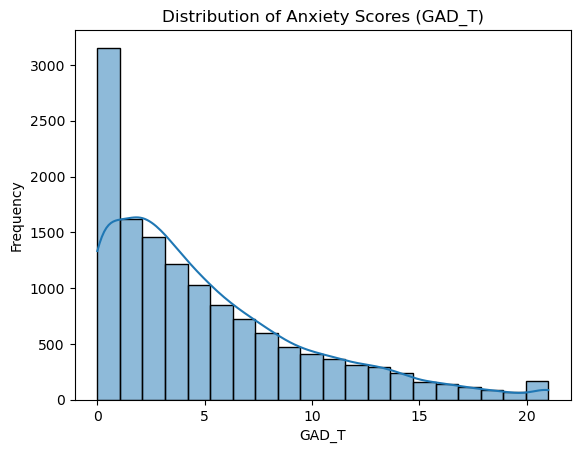

In [5]:
# Data Visualization Step
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of GAD_T (target variable)
sns.histplot(df['GAD_T'], bins=20, kde=True)
plt.title('Distribution of Anxiety Scores (GAD_T)')
plt.xlabel('GAD_T')
plt.ylabel('Frequency')
plt.show()


In [6]:
# Data Cleaning
# Check for missing values
print(df.isnull().sum())

# Drop columns with more than 50% missing data
threshold = len(df) * 0.5
df = df.loc[:, df.isnull().sum() < threshold]

# Drop rows with any missing values
df = df.dropna()

# Reset index after dropping rows
df = df.reset_index(drop=True)

# Verify no missing values
print(df.isnull().sum())

GAD1               0
GAD2               0
GAD3               0
GAD4               0
GAD5               0
GAD6               0
GAD7               0
GADE               0
SWL1               0
SWL2               0
SWL3               0
SWL4               0
SWL5               0
Game               0
Platform           0
Hours              0
earnings           0
whyplay            0
League             0
streams            0
SPIN1              0
SPIN2              0
SPIN3              0
SPIN4              0
SPIN5              0
SPIN6              0
SPIN7              0
SPIN8              0
SPIN9              0
SPIN10             0
SPIN11             0
SPIN12             0
SPIN13             0
SPIN14             0
SPIN15             0
SPIN16             0
SPIN17             0
Narcissism         0
Gender             0
Age                0
Work               0
Degree             0
Birthplace         0
Residence          0
Reference          0
Playstyle          0
accept             0
GAD_T        

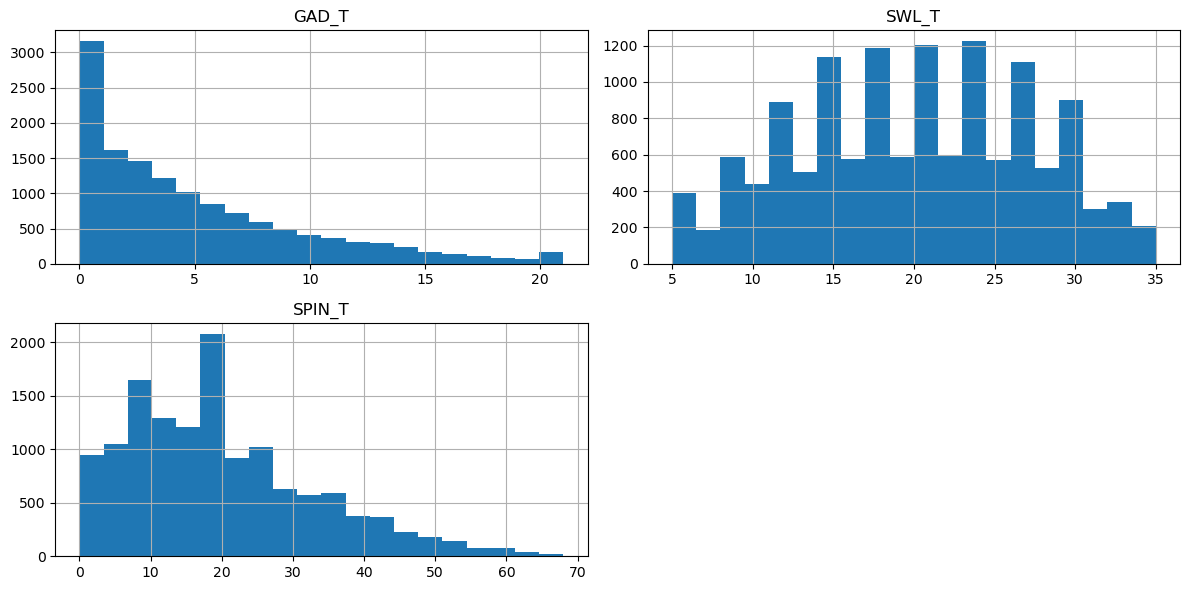

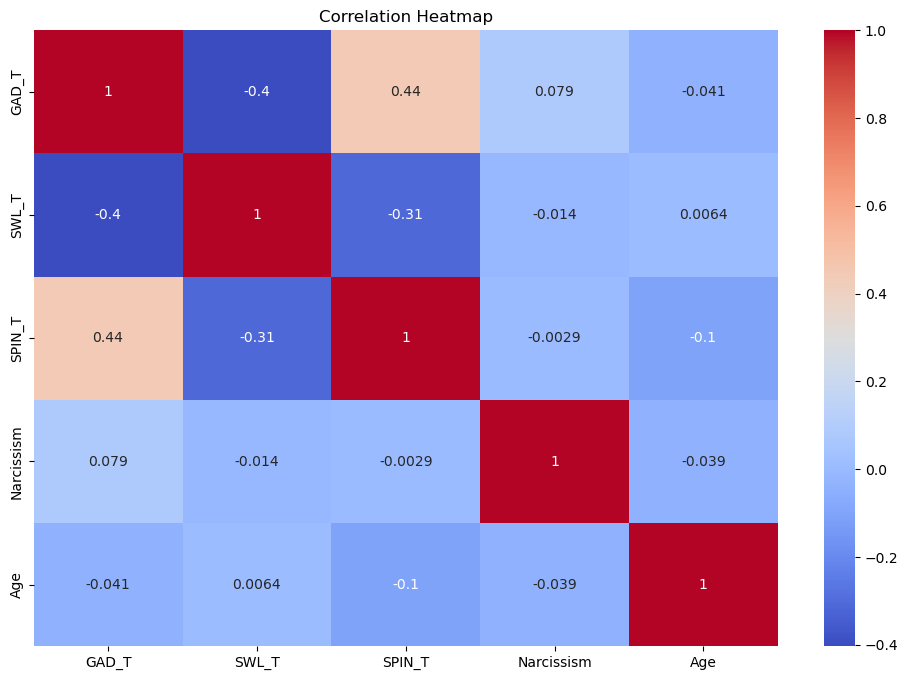

In [7]:
# Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Visualize distribution of a few features
df[['GAD_T', 'SWL_T', 'SPIN_T']].hist(bins=20, figsize=(12, 6))
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[['GAD_T', 'SWL_T', 'SPIN_T', 'Narcissism', 'Age']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

C:\Users\احمد\AppData\Local\Temp\ipykernel_7132\4081786979.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age', y='GAD_T', data=df, palette='pastel')


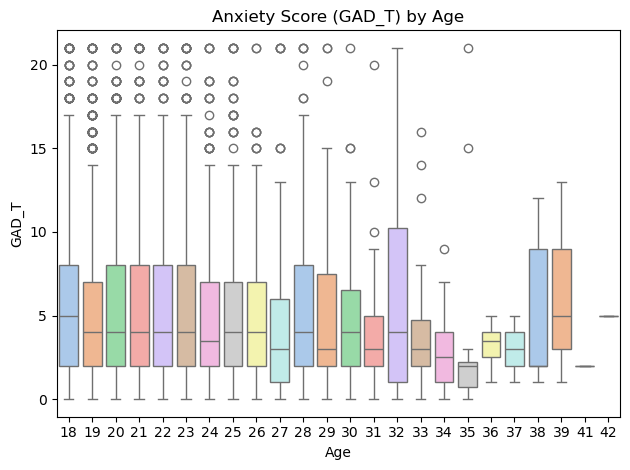

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Basic single boxplot: GAD_T by Gender
sns.boxplot(x='Age', y='GAD_T', data=df, palette='pastel')
plt.title('Anxiety Score (GAD_T) by Age')
plt.xlabel('Age')
plt.ylabel('GAD_T')
plt.tight_layout()
plt.show()


In [8]:
# Feature Encoding and Preparation
# Convert categorical columns to numerical using Label Encoding
from sklearn.preprocessing import LabelEncoder
categorical_cols = df.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Verify data types
print(df.dtypes)

GAD1                 int64
GAD2                 int64
GAD3                 int64
GAD4                 int64
GAD5                 int64
GAD6                 int64
GAD7                 int64
GADE                 int32
SWL1                 int64
SWL2                 int64
SWL3                 int64
SWL4                 int64
SWL5                 int64
Game                 int32
Platform             int32
Hours              float64
earnings             int32
whyplay              int32
League               int32
streams            float64
SPIN1              float64
SPIN2              float64
SPIN3              float64
SPIN4              float64
SPIN5              float64
SPIN6              float64
SPIN7              float64
SPIN8              float64
SPIN9              float64
SPIN10             float64
SPIN11             float64
SPIN12             float64
SPIN13             float64
SPIN14             float64
SPIN15             float64
SPIN16             float64
SPIN17             float64
N

In [9]:
# Splitting the Dataset
# Define features and target
X = df.drop(columns=['GAD_T'])  # Predicting GAD_T (Anxiety Score)
y = df['GAD_T']

# Binary classification: high anxiety if GAD_T >= 10
y = (y >= 10).astype(int)

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (10771, 51)
Testing set size: (2693, 51)


In [10]:
# Data Normalization
# Standardize the data (mean=0, std=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Linear Regression Assumption Check - Fit Model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_train)

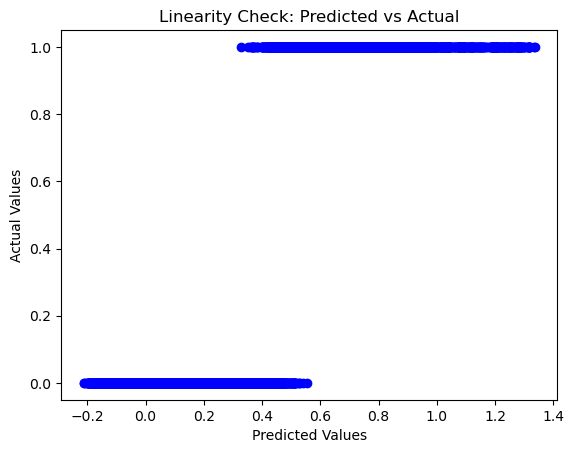

In [12]:
# Check Linearity
import matplotlib.pyplot as plt
plt.scatter(y_pred, y_train, color='blue')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Linearity Check: Predicted vs Actual')
plt.show()

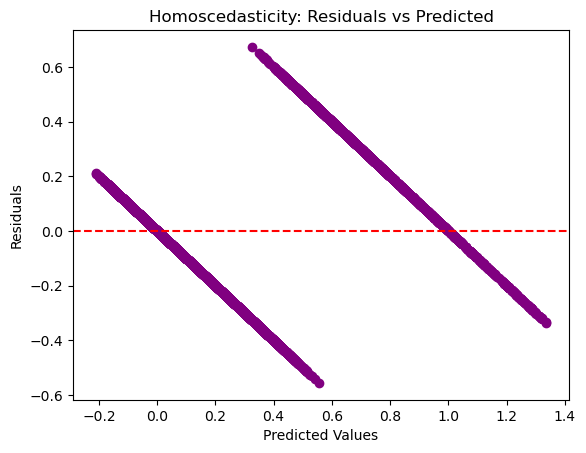

In [13]:
# Check Homoscedasticity
residuals = y_train - y_pred
plt.scatter(y_pred, residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity: Residuals vs Predicted')
plt.show()

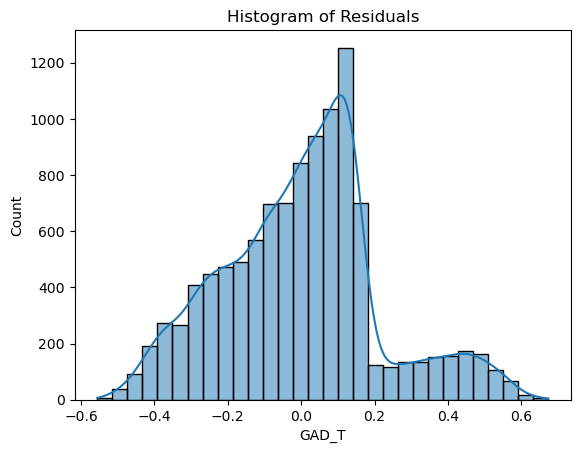

In [14]:
# Check Normality of Residuals
import seaborn as sns
sns.histplot(residuals, kde=True, bins=30)
plt.title('Histogram of Residuals')
plt.show()

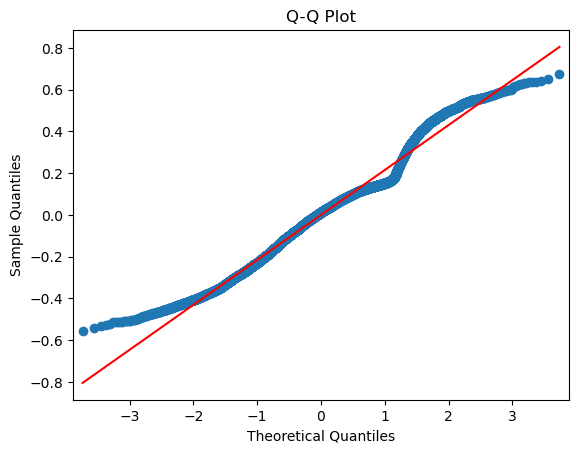

In [15]:
# Q-Q Plot of Residuals
import statsmodels.api as sm
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot')
plt.show()

In [16]:
# Durbin-Watson Test for Autocorrelation
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(residuals)
print("Durbin-Watson Statistic:", dw)

Durbin-Watson Statistic: 2.010306733650701


In [17]:
# Support Vector Machine (SVM) Model
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

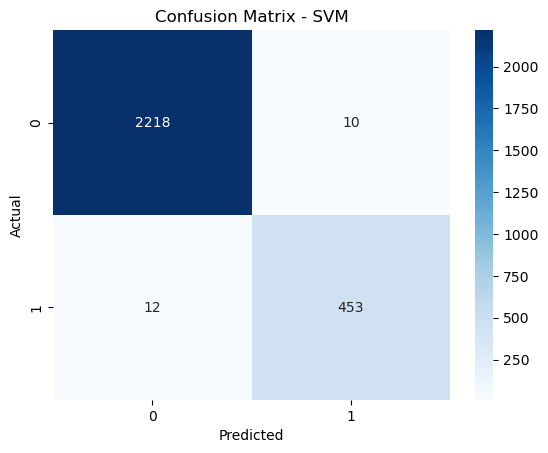

In [18]:
# Confusion Matrix - SVM
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [19]:
# Classification Report - SVM
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2228
           1       0.98      0.97      0.98       465

    accuracy                           0.99      2693
   macro avg       0.99      0.98      0.99      2693
weighted avg       0.99      0.99      0.99      2693



In [20]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

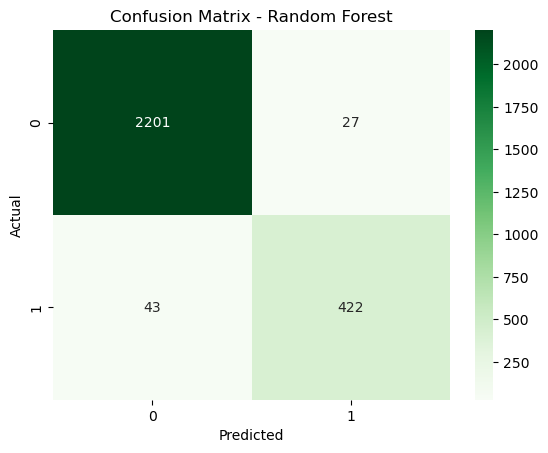

In [21]:
# Confusion Matrix - Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [22]:
# Classification Report - Random Forest
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2228
           1       0.94      0.91      0.92       465

    accuracy                           0.97      2693
   macro avg       0.96      0.95      0.95      2693
weighted avg       0.97      0.97      0.97      2693



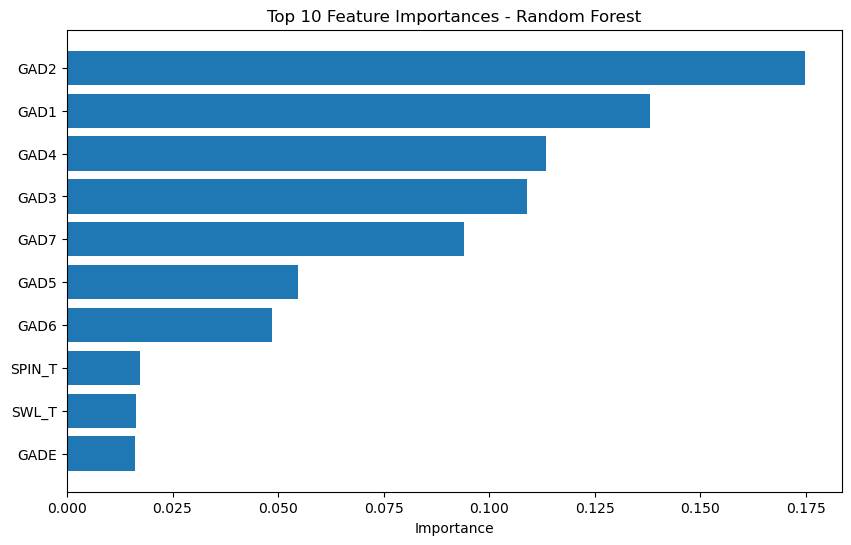

In [23]:
# Feature Importance - Random Forest
import numpy as np
import pandas as pd
feature_names = df.drop(columns=['GAD_T']).columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-10:]
plt.figure(figsize=(10, 6))
plt.title('Top 10 Feature Importances - Random Forest')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Importance')
plt.show()

In [24]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

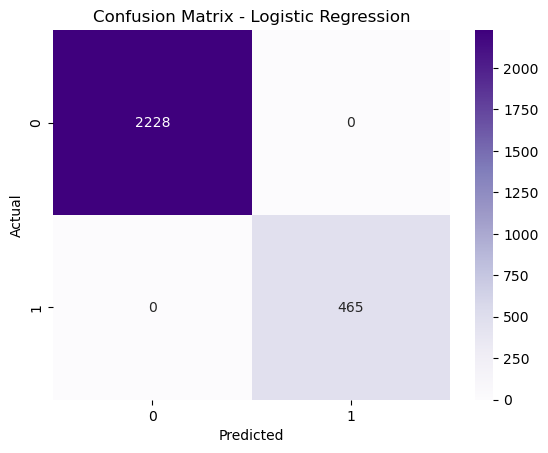

In [25]:
# Confusion Matrix - Logistic Regression
cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [26]:
# Classification Report - Logistic Regression
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2228
           1       1.00      1.00      1.00       465

    accuracy                           1.00      2693
   macro avg       1.00      1.00      1.00      2693
weighted avg       1.00      1.00      1.00      2693



In [27]:
# Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

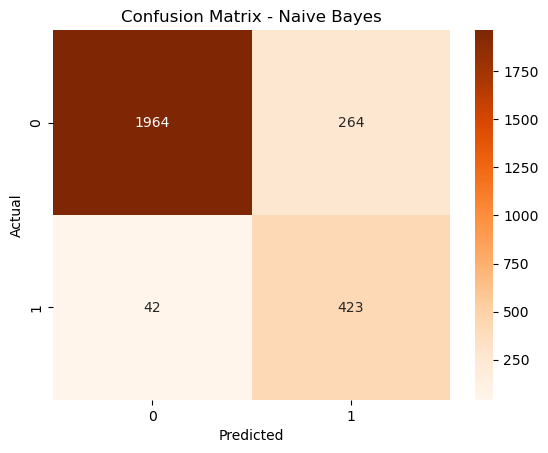

In [28]:
# Confusion Matrix - Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [29]:
# Classification Report - Naive Bayes
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      2228
           1       0.62      0.91      0.73       465

    accuracy                           0.89      2693
   macro avg       0.80      0.90      0.83      2693
weighted avg       0.92      0.89      0.89      2693



In [30]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

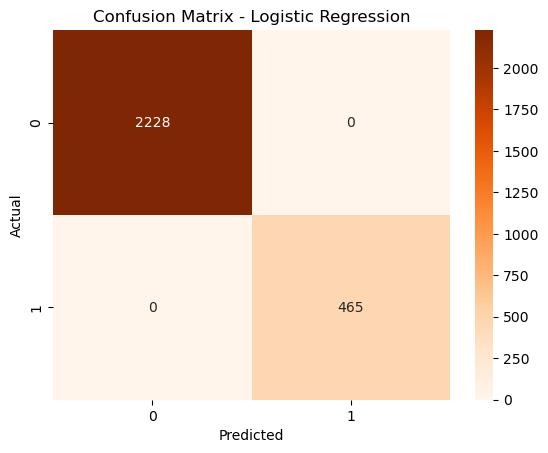

In [31]:
# Confusion Matrix - Logistic Regression
cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [32]:
# Classification Report - Logistic Regression
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2228
           1       1.00      1.00      1.00       465

    accuracy                           1.00      2693
   macro avg       1.00      1.00      1.00      2693
weighted avg       1.00      1.00      1.00      2693



In [33]:
# Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

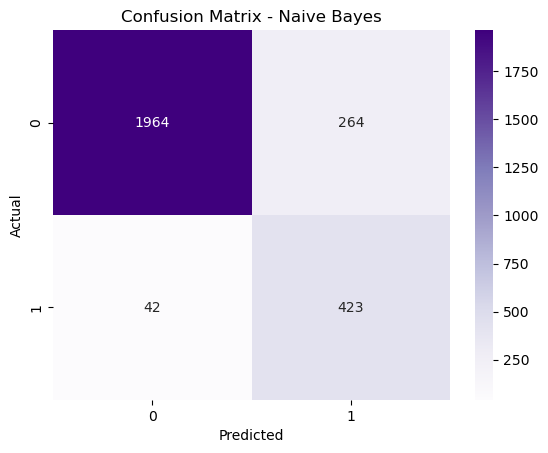

In [34]:
# Confusion Matrix - Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [35]:
# Classification Report - Naive Bayes
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      2228
           1       0.62      0.91      0.73       465

    accuracy                           0.89      2693
   macro avg       0.80      0.90      0.83      2693
weighted avg       0.92      0.89      0.89      2693



In [36]:
# XGBoost Model
from xgboost import XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

C:\Users\احمد\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [12:10:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


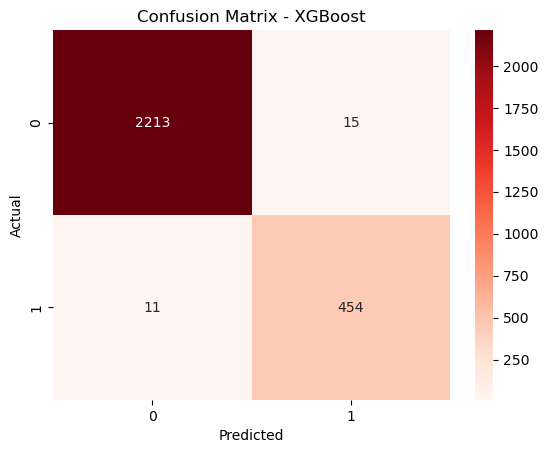

In [37]:
# Confusion Matrix - XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [38]:
# Classification Report - XGBoost
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2228
           1       0.97      0.98      0.97       465

    accuracy                           0.99      2693
   macro avg       0.98      0.98      0.98      2693
weighted avg       0.99      0.99      0.99      2693



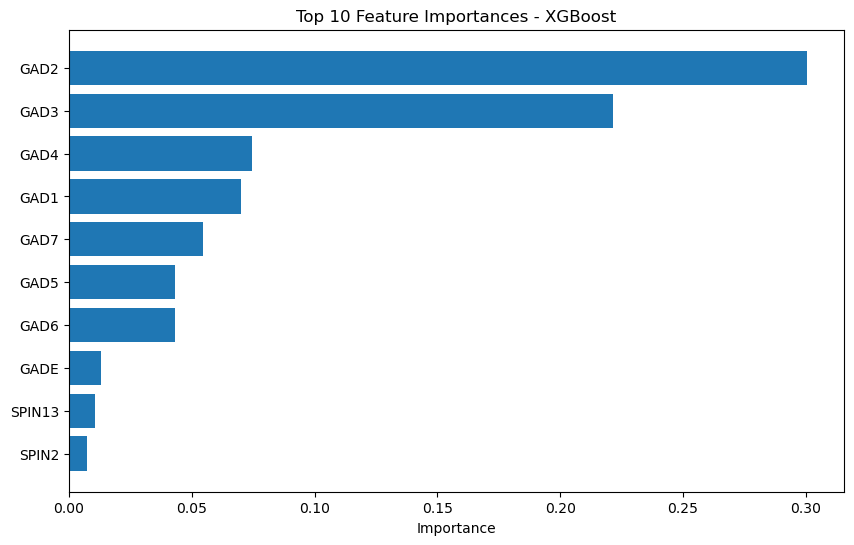

In [39]:
# Feature Importance - XGBoost
import matplotlib.pyplot as plt
importances = xgb_model.feature_importances_
indices = np.argsort(importances)[-10:]
plt.figure(figsize=(10, 6))
plt.title('Top 10 Feature Importances - XGBoost')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Importance')
plt.show()

In [40]:
# Model Comparison
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics for each model
models = {
    'SVM': y_pred_svm,
    'Random Forest': y_pred_rf,
    'Logistic Regression': y_pred_log,
    'Naive Bayes': y_pred_nb,
    'XGBoost': y_pred_xgb
}

results = []
for name, pred in models.items():
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, pred),
        'Precision': precision_score(y_test, pred),
        'Recall': recall_score(y_test, pred),
        'F1 Score': f1_score(y_test, pred)
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0                  SVM  0.991831   0.978402  0.974194  0.976293
1        Random Forest  0.974007   0.939866  0.907527  0.923414
2  Logistic Regression  1.000000   1.000000  1.000000  1.000000
3          Naive Bayes  0.886372   0.615721  0.909677  0.734375
4              XGBoost  0.990345   0.968017  0.976344  0.972163


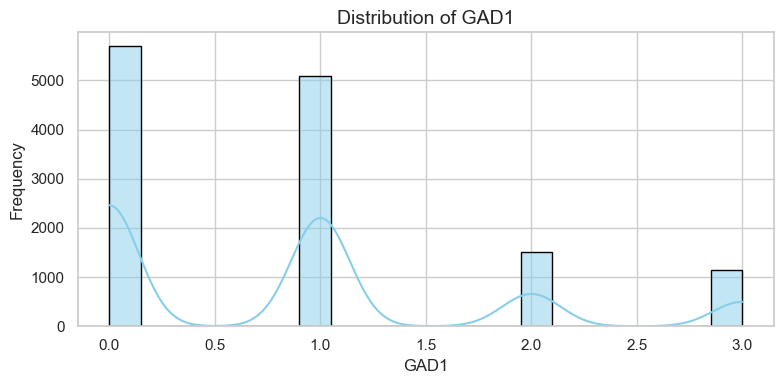

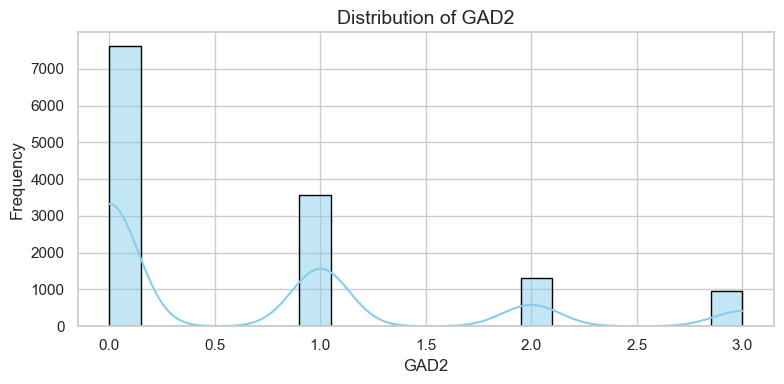

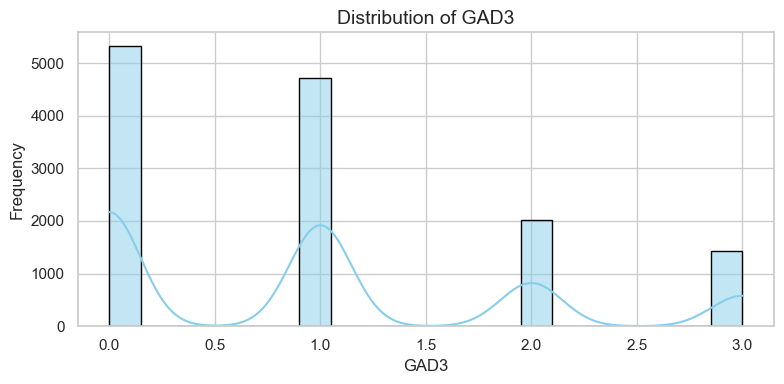

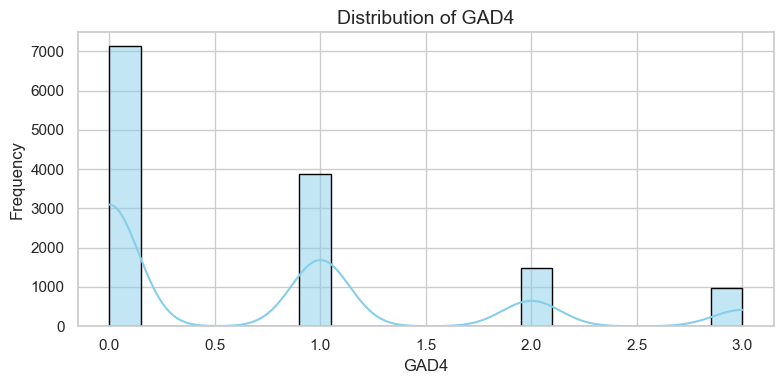

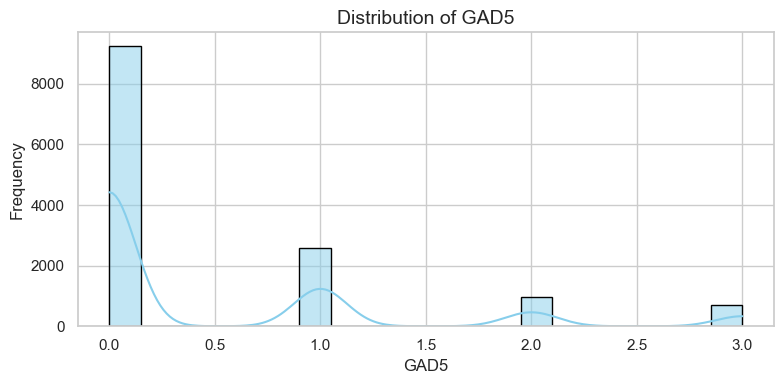

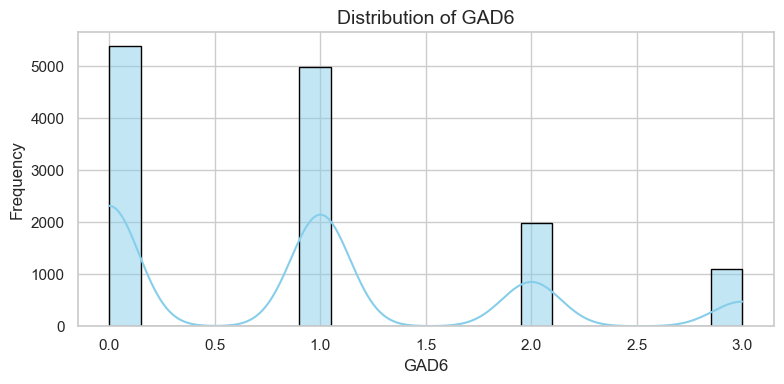

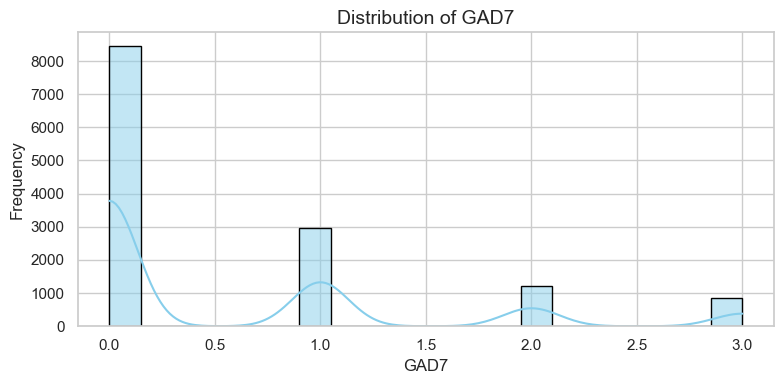

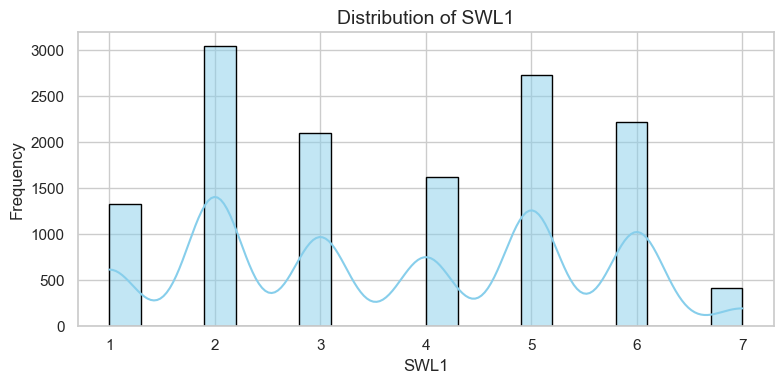

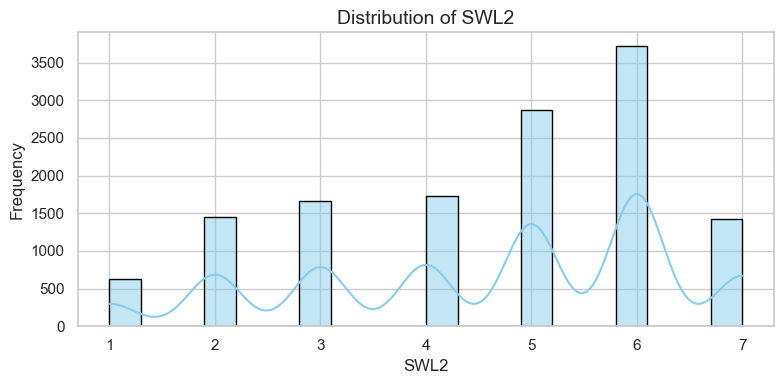

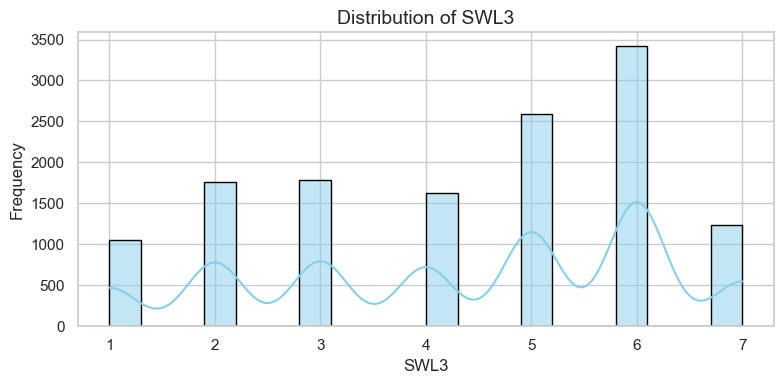

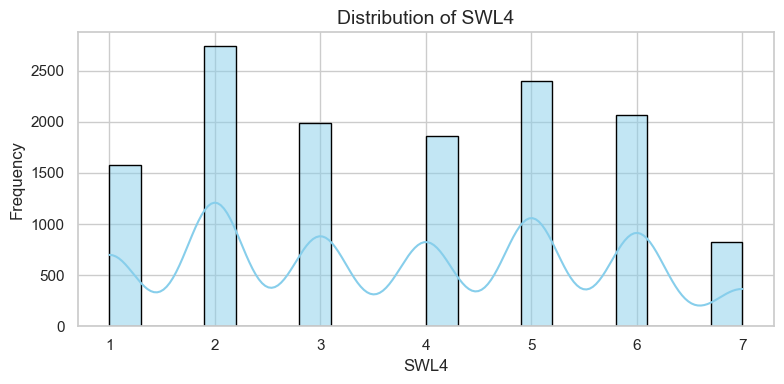

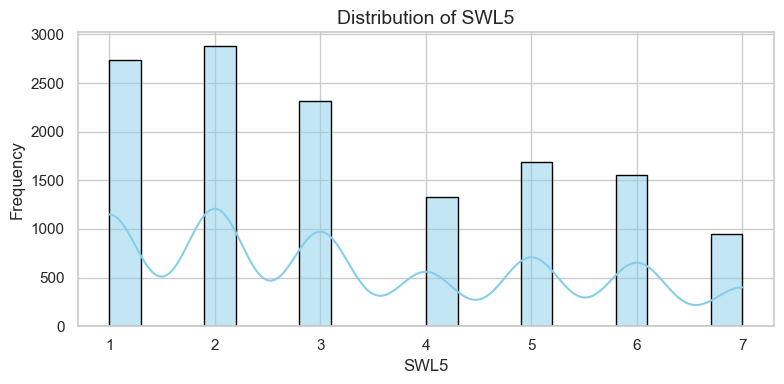

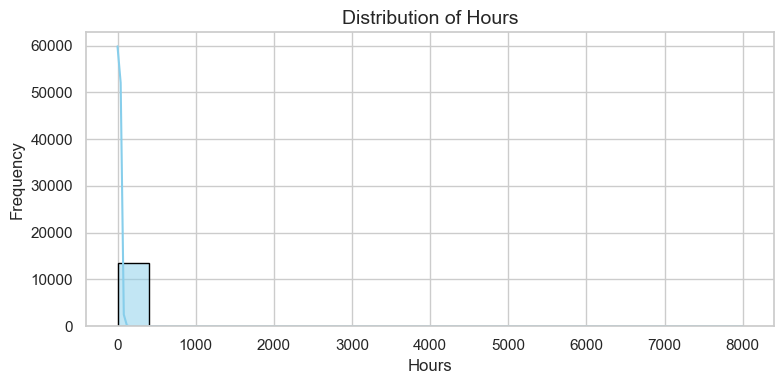

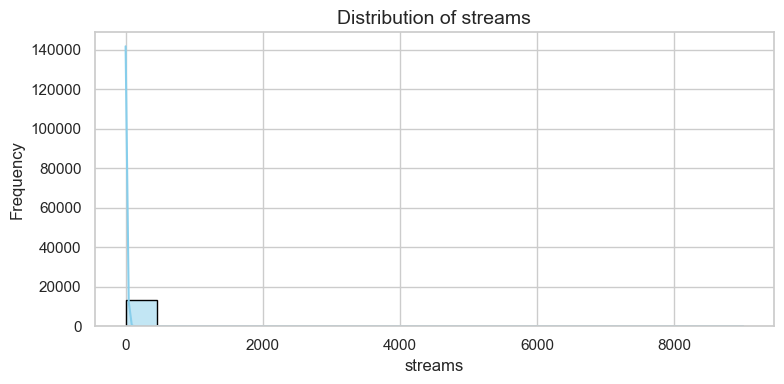

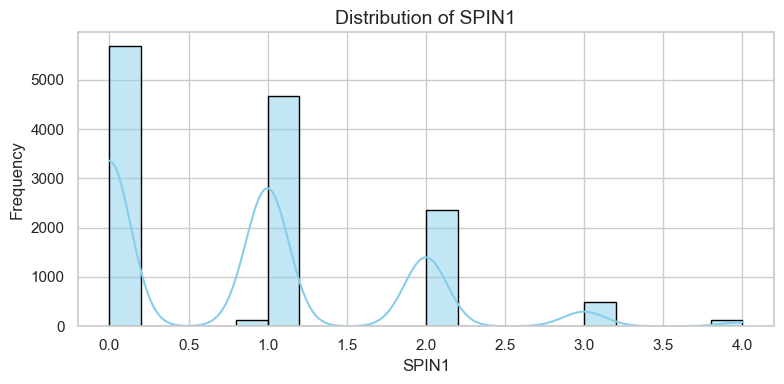

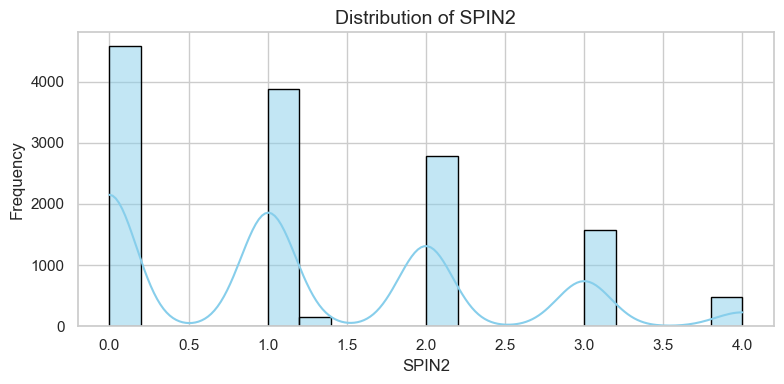

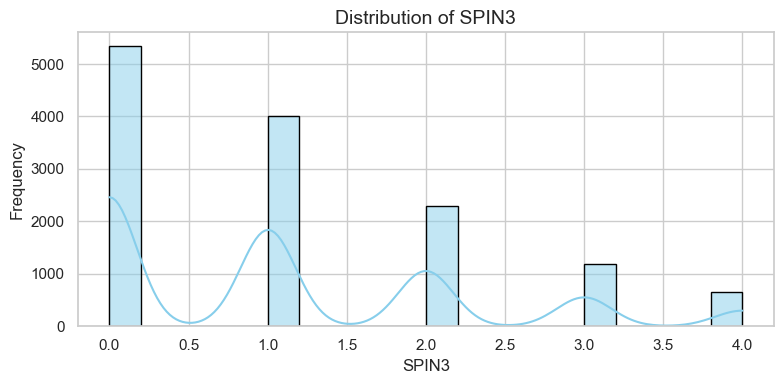

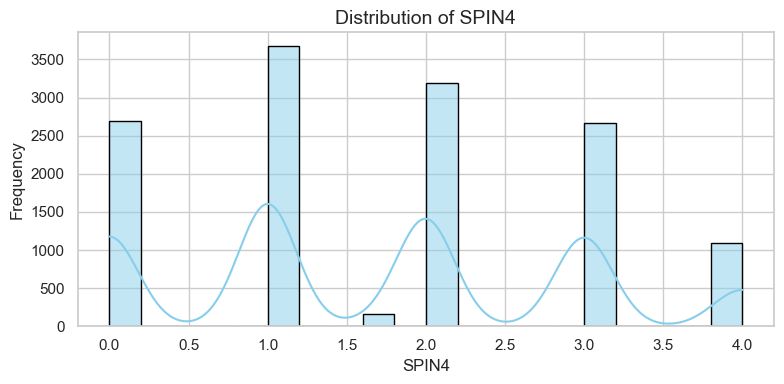

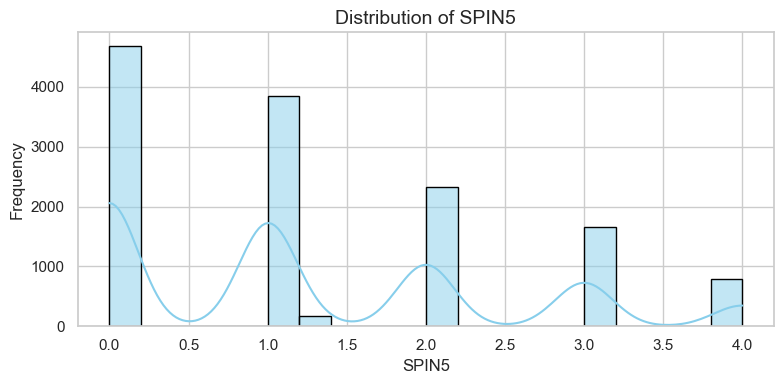

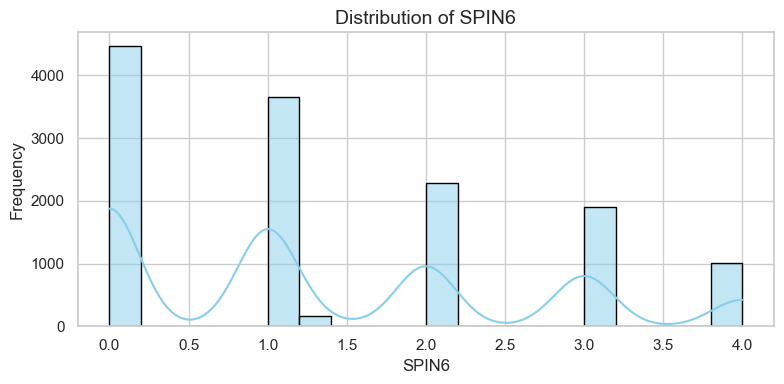

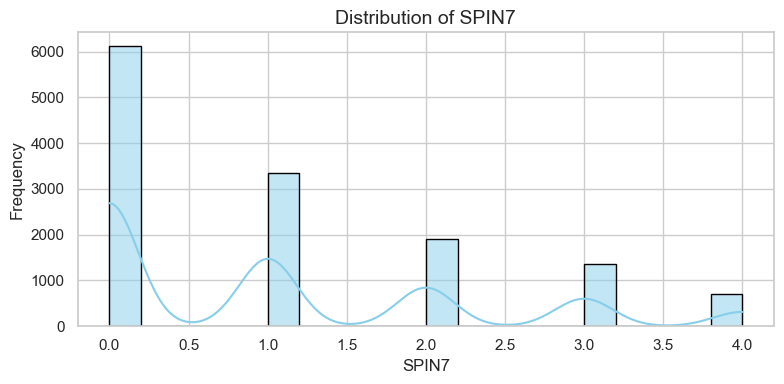

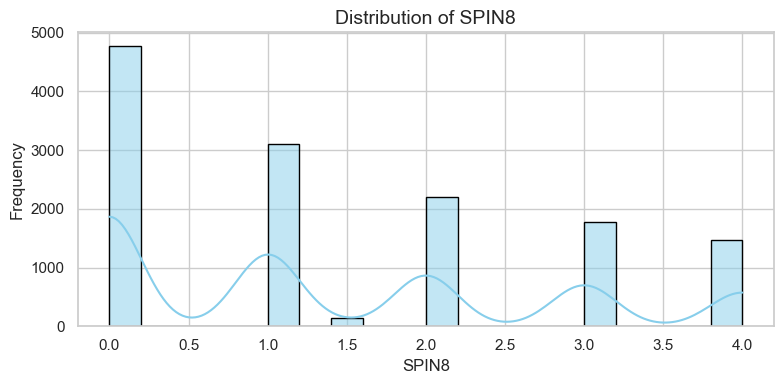

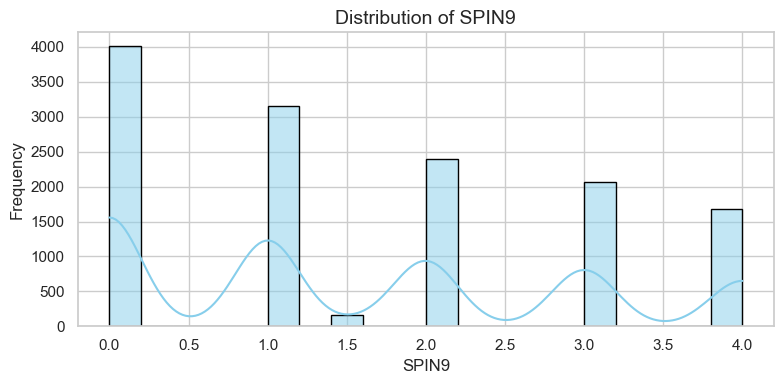

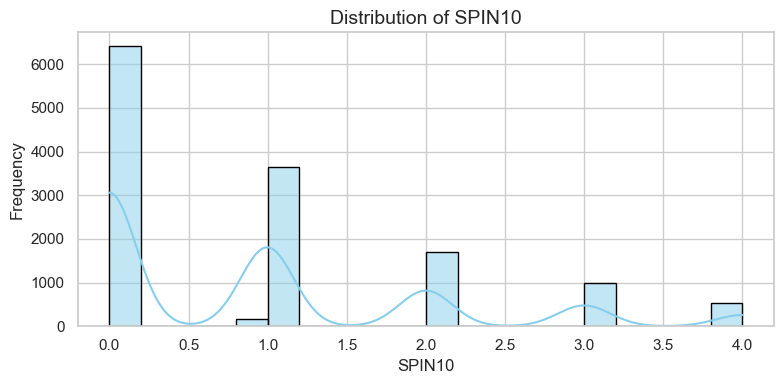

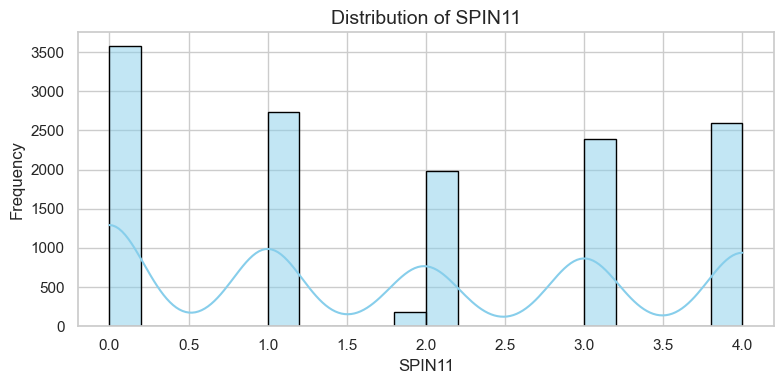

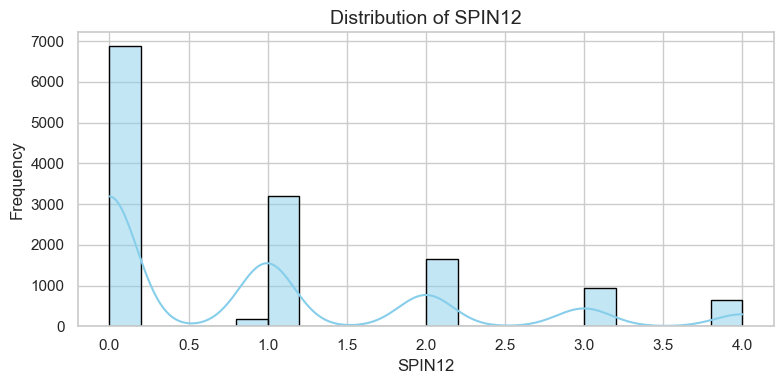

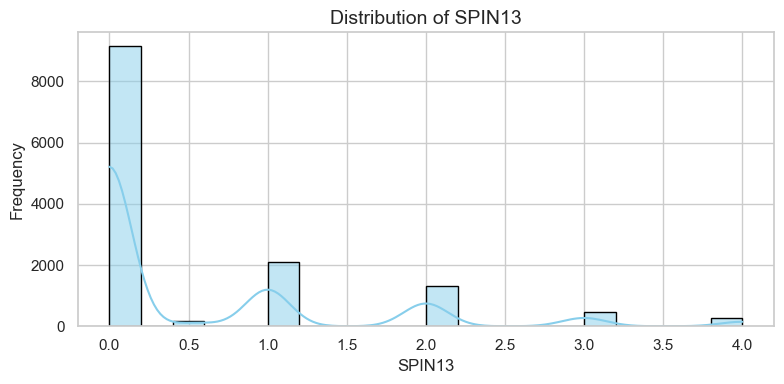

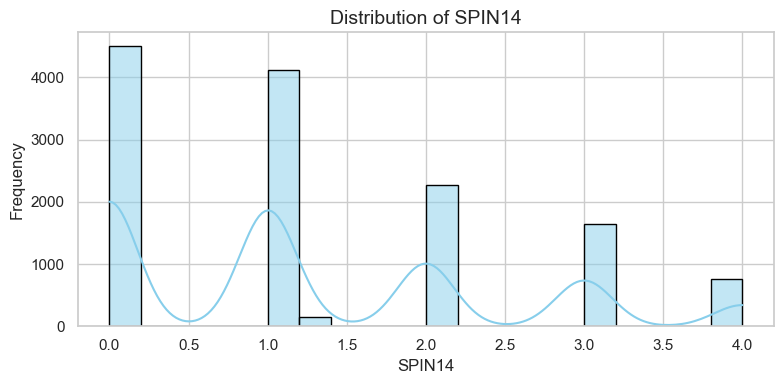

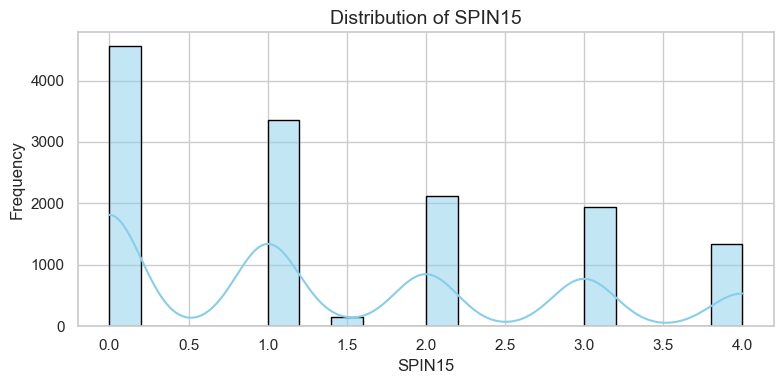

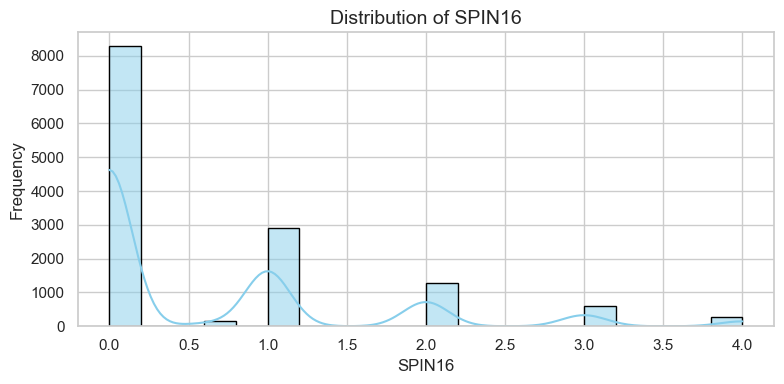

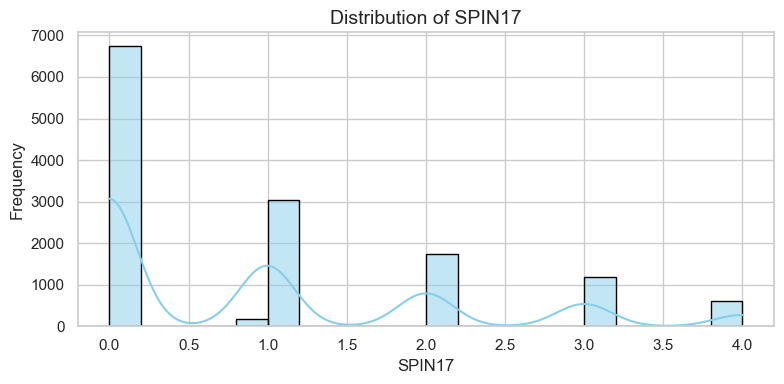

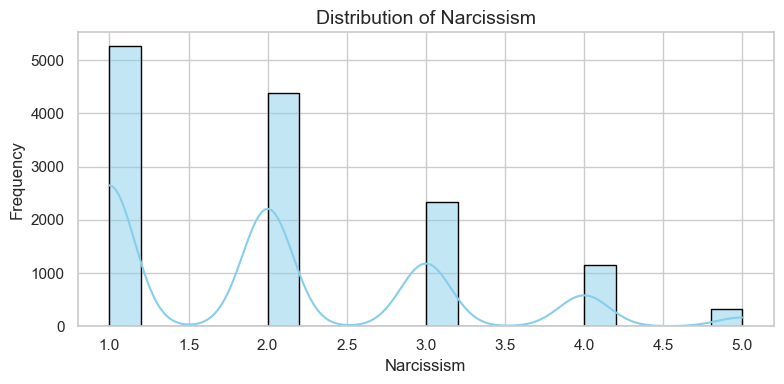

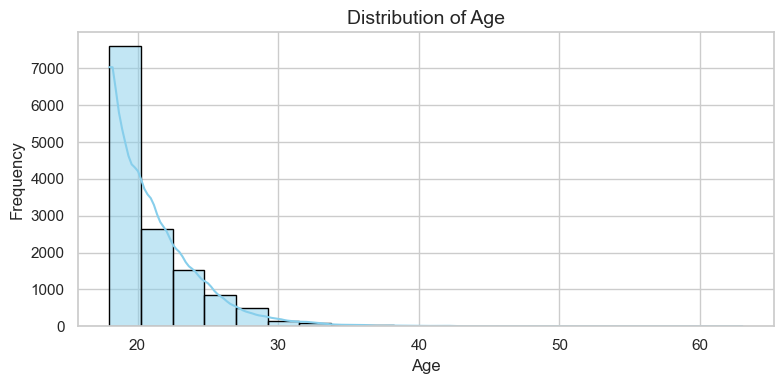

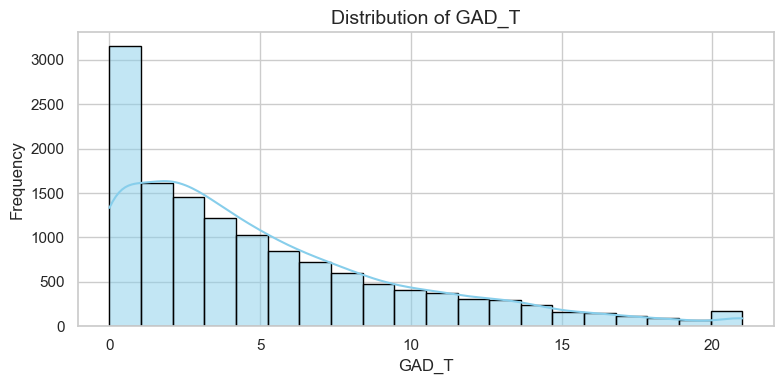

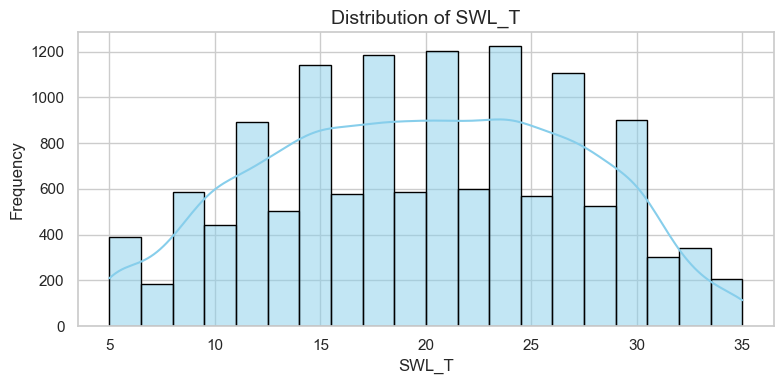

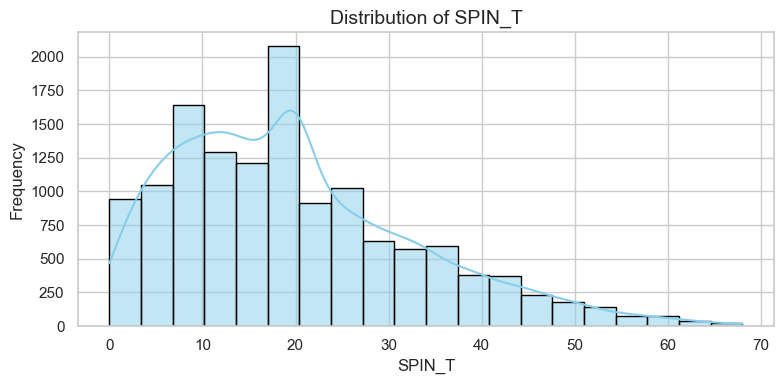

<Figure size 800x400 with 0 Axes>

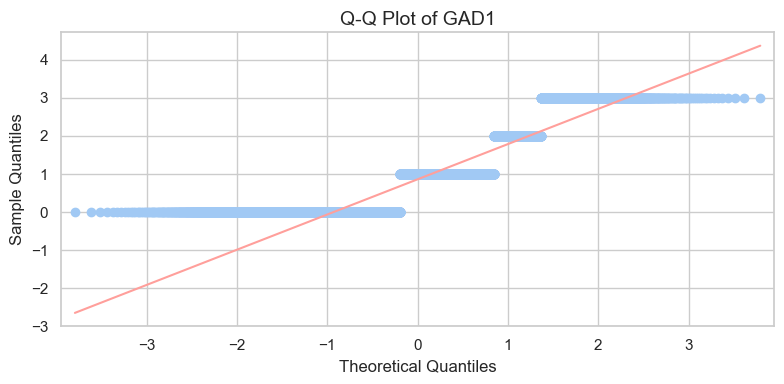

<Figure size 800x400 with 0 Axes>

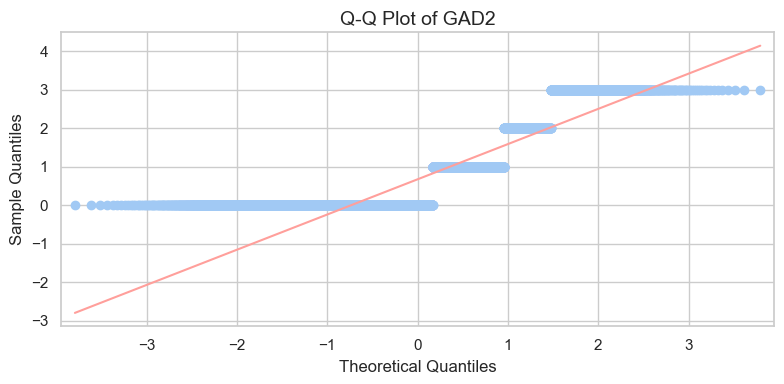

<Figure size 800x400 with 0 Axes>

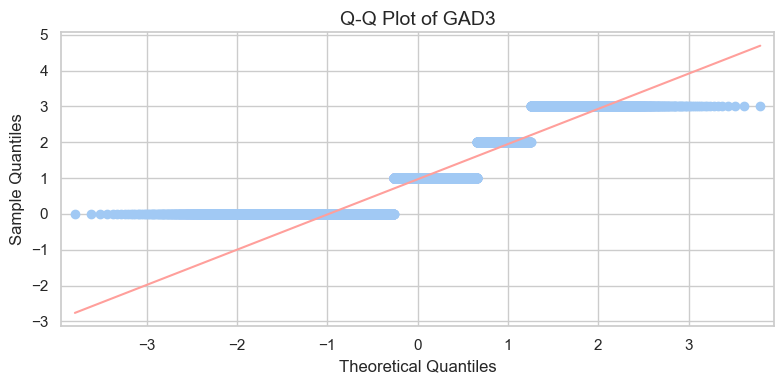

<Figure size 800x400 with 0 Axes>

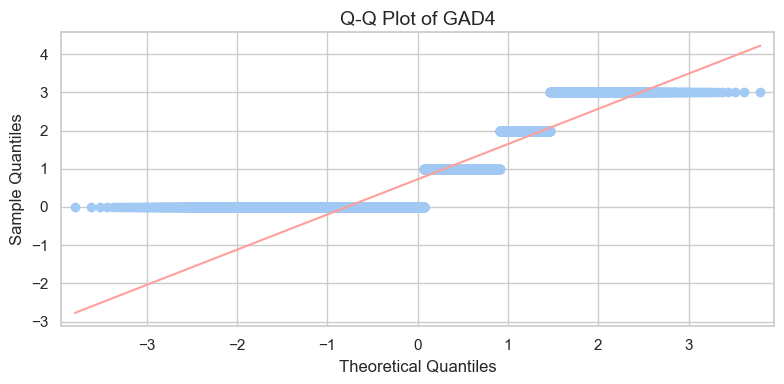

<Figure size 800x400 with 0 Axes>

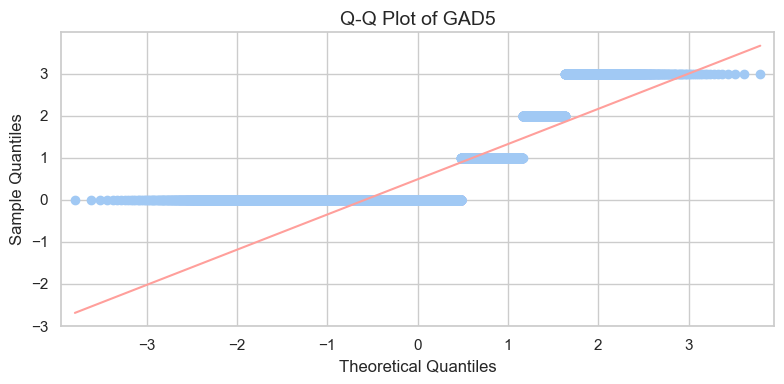

<Figure size 800x400 with 0 Axes>

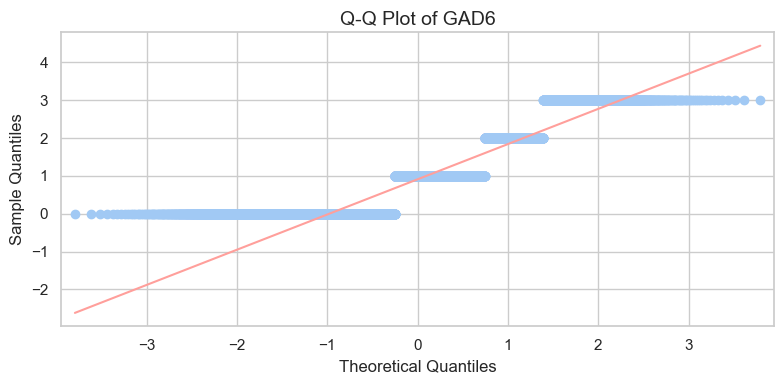

<Figure size 800x400 with 0 Axes>

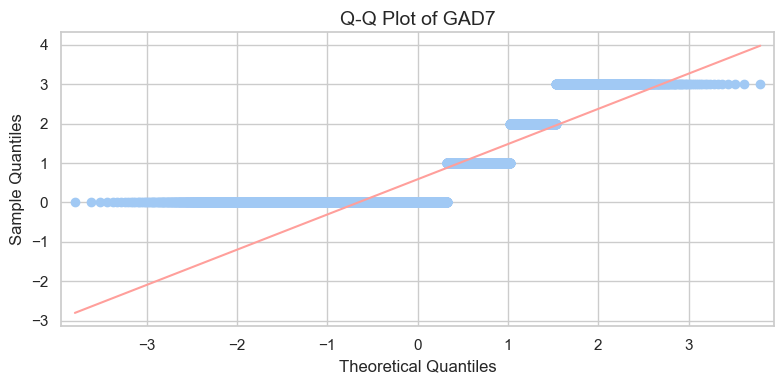

<Figure size 800x400 with 0 Axes>

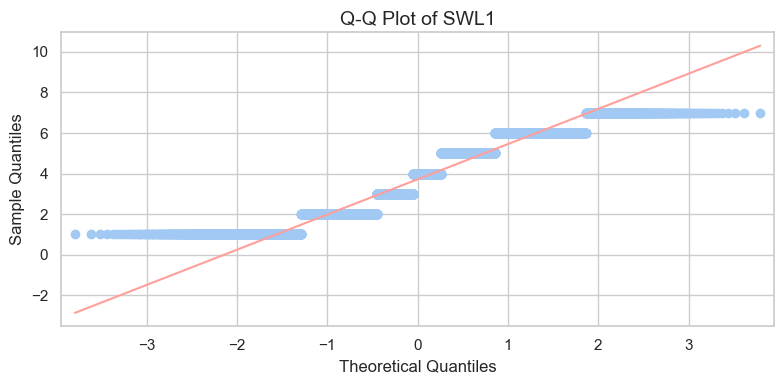

<Figure size 800x400 with 0 Axes>

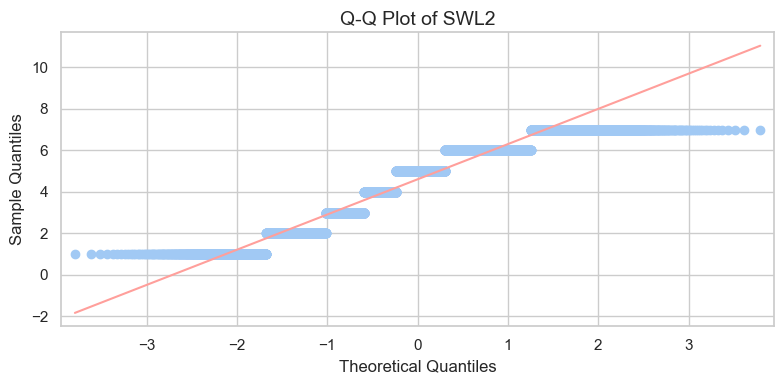

<Figure size 800x400 with 0 Axes>

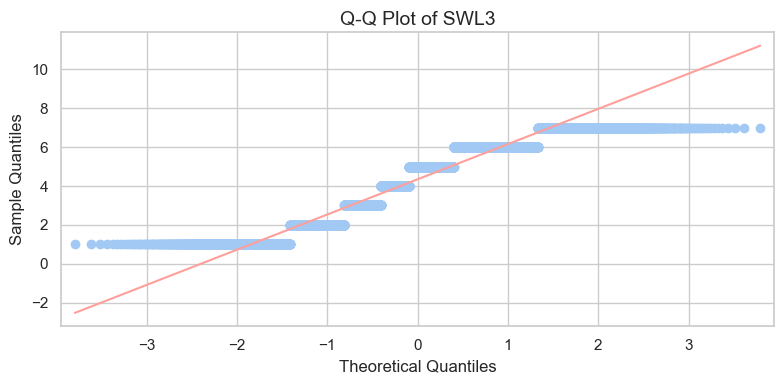

<Figure size 800x400 with 0 Axes>

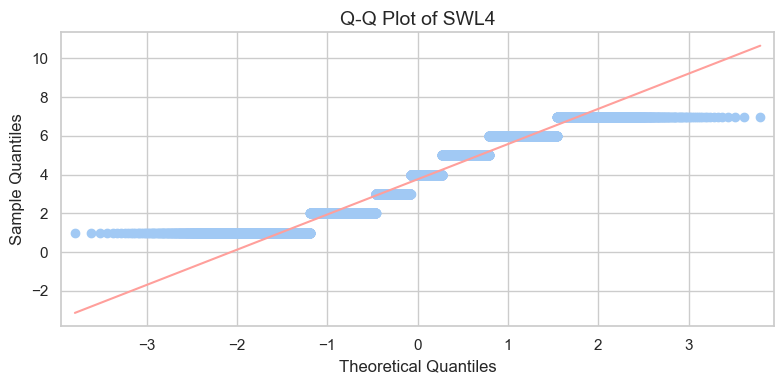

<Figure size 800x400 with 0 Axes>

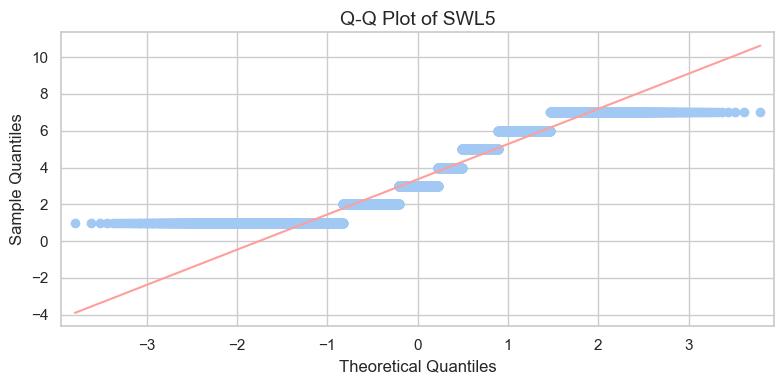

<Figure size 800x400 with 0 Axes>

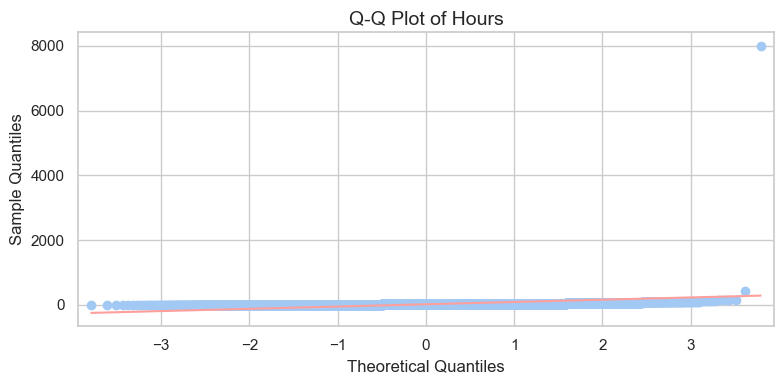

<Figure size 800x400 with 0 Axes>

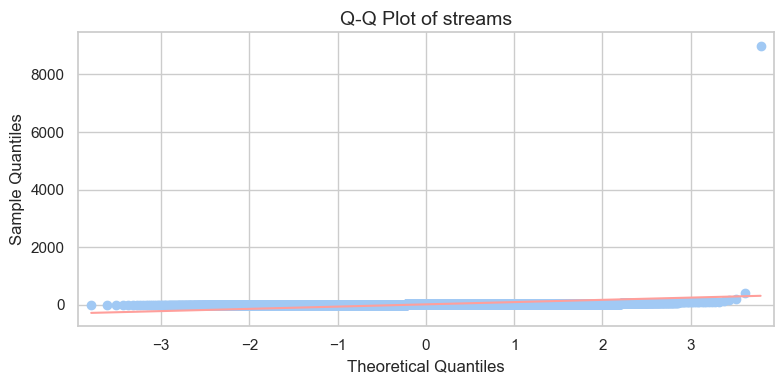

<Figure size 800x400 with 0 Axes>

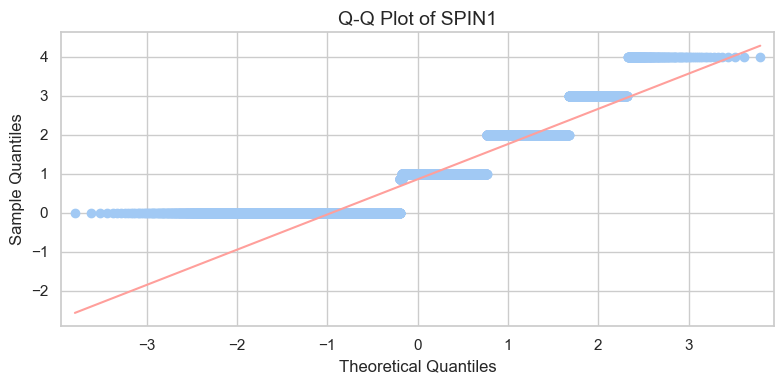

<Figure size 800x400 with 0 Axes>

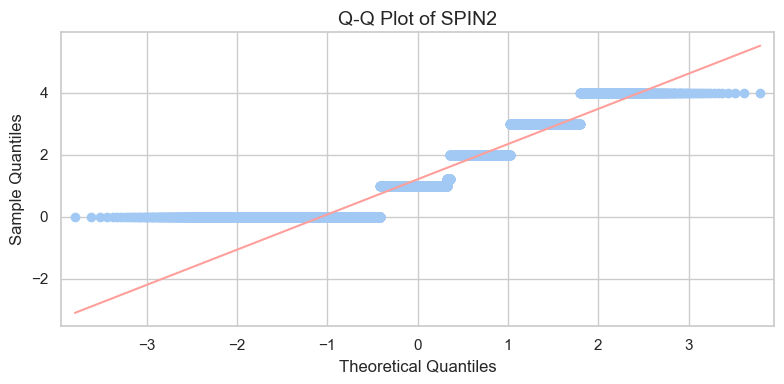

<Figure size 800x400 with 0 Axes>

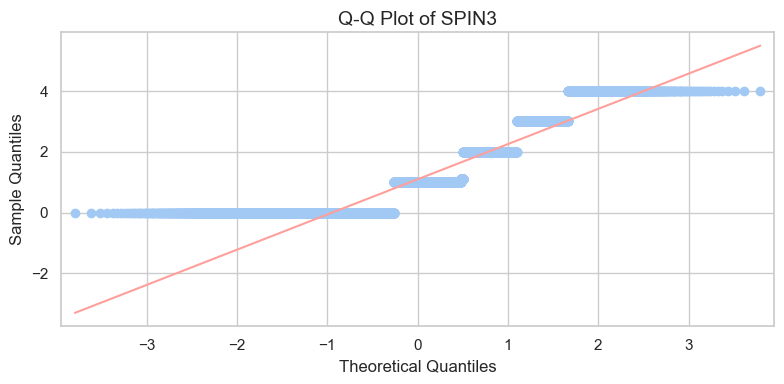

<Figure size 800x400 with 0 Axes>

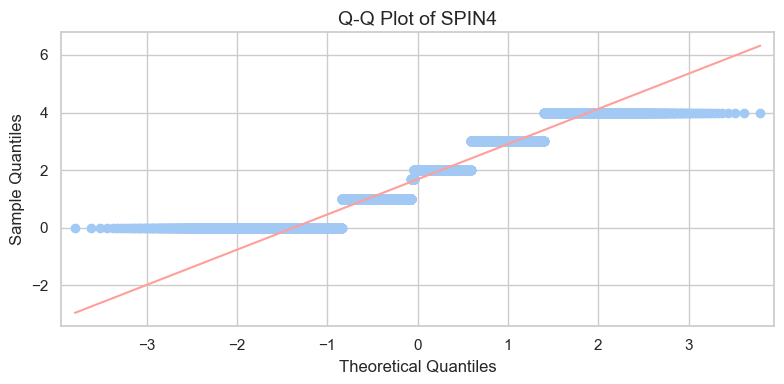

<Figure size 800x400 with 0 Axes>

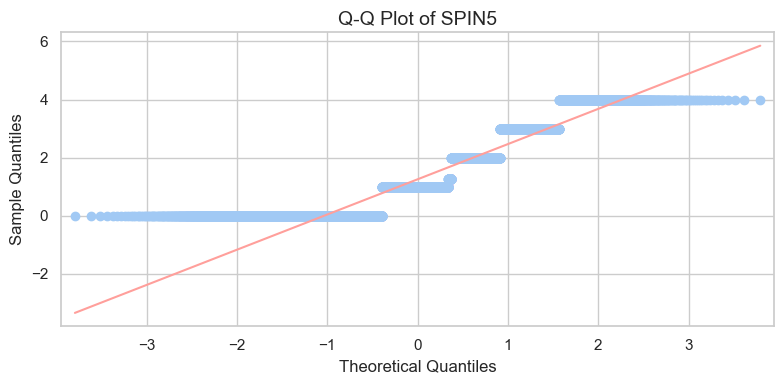

<Figure size 800x400 with 0 Axes>

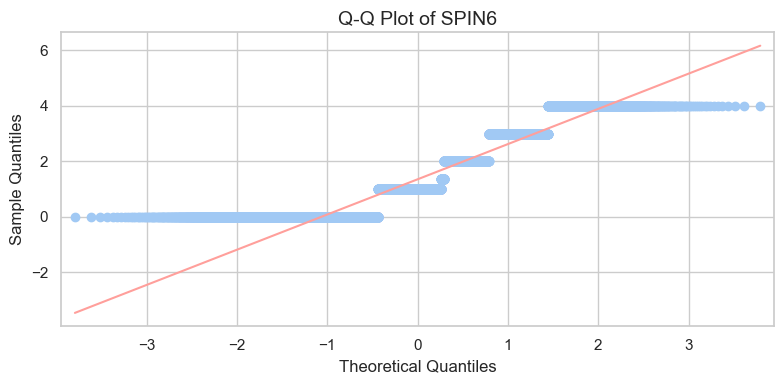

<Figure size 800x400 with 0 Axes>

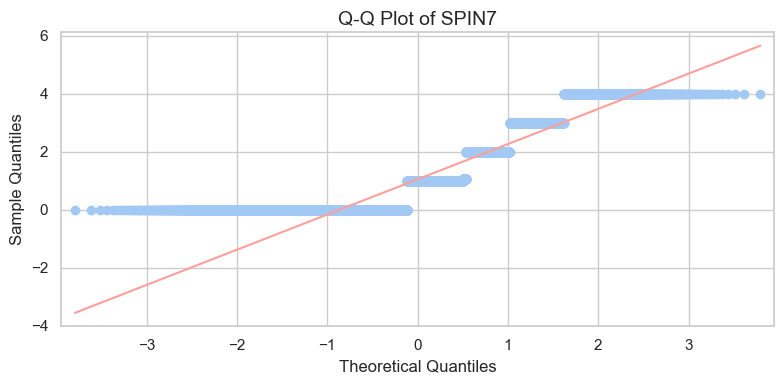

<Figure size 800x400 with 0 Axes>

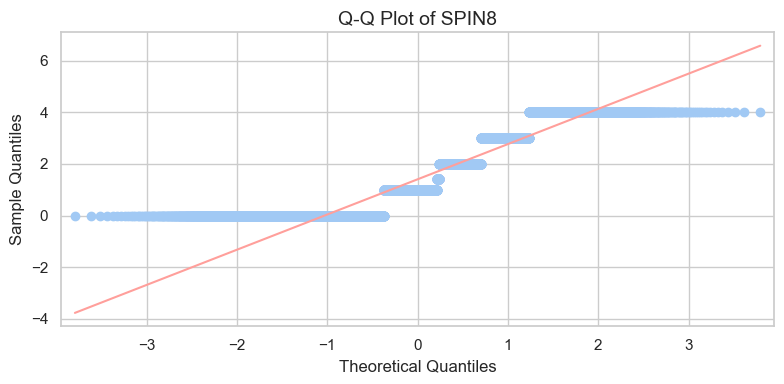

<Figure size 800x400 with 0 Axes>

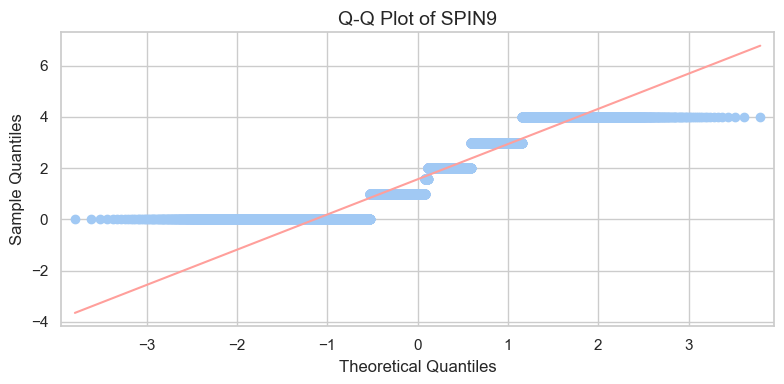

<Figure size 800x400 with 0 Axes>

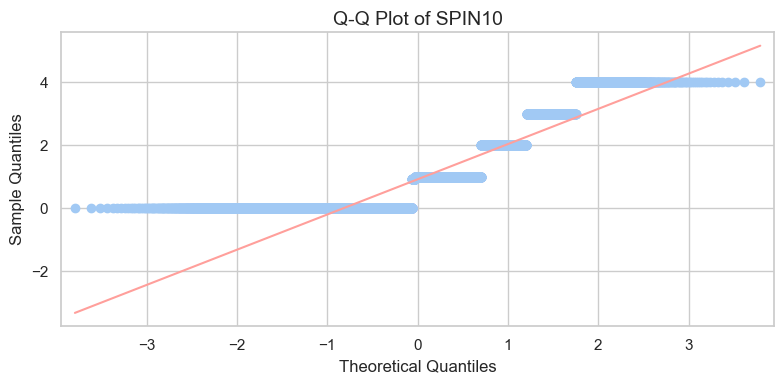

<Figure size 800x400 with 0 Axes>

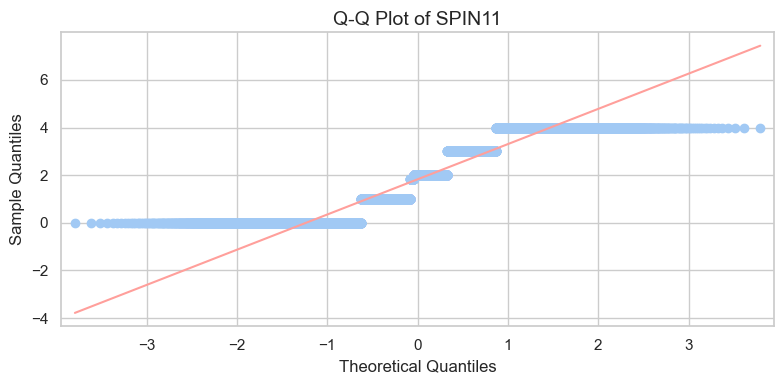

<Figure size 800x400 with 0 Axes>

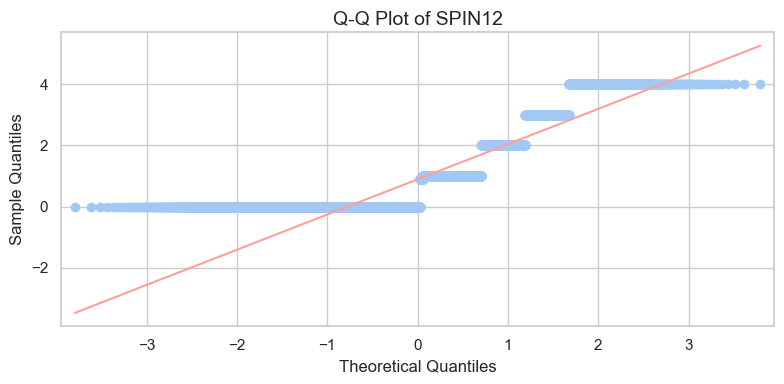

<Figure size 800x400 with 0 Axes>

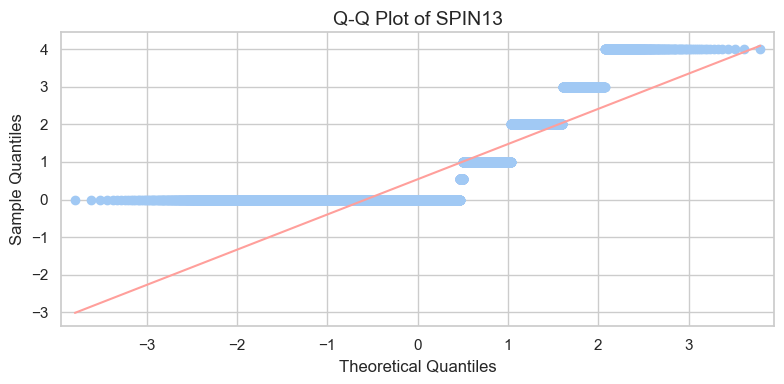

<Figure size 800x400 with 0 Axes>

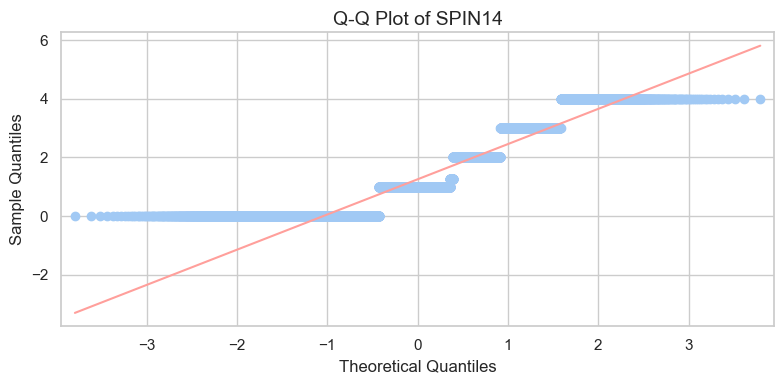

<Figure size 800x400 with 0 Axes>

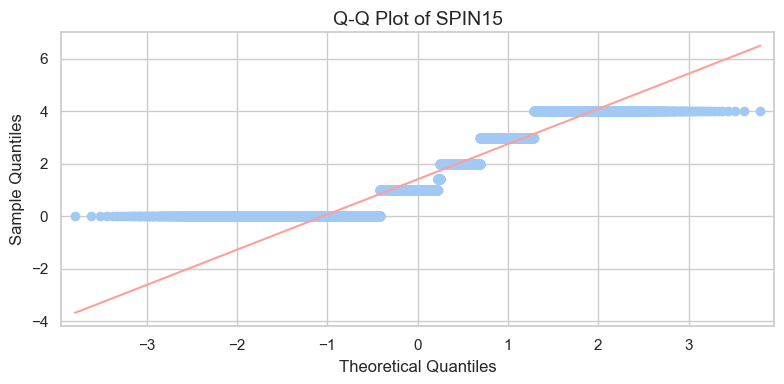

<Figure size 800x400 with 0 Axes>

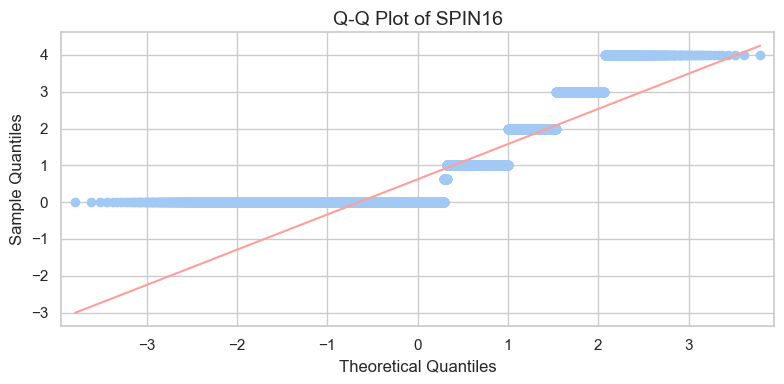

<Figure size 800x400 with 0 Axes>

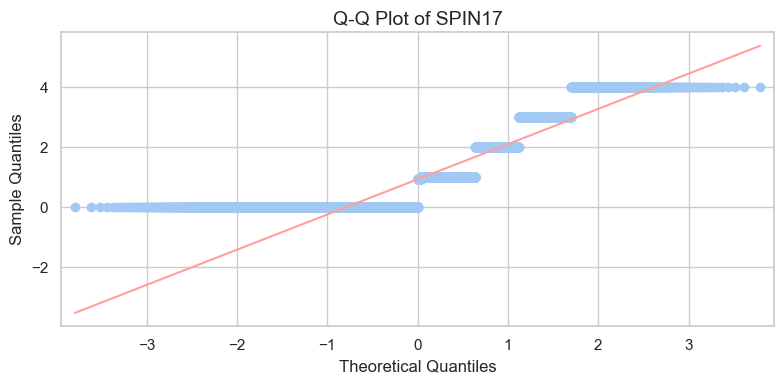

<Figure size 800x400 with 0 Axes>

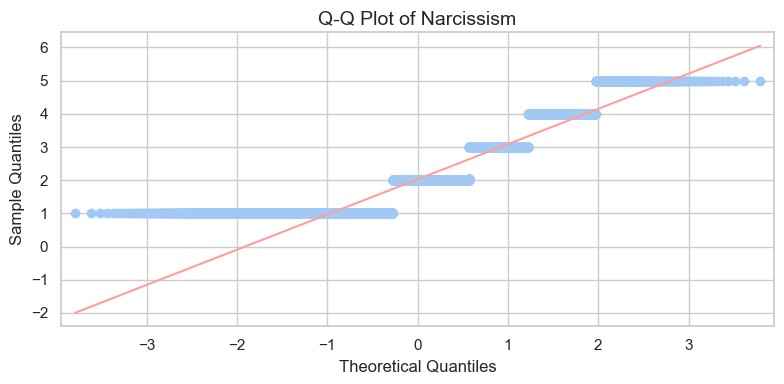

<Figure size 800x400 with 0 Axes>

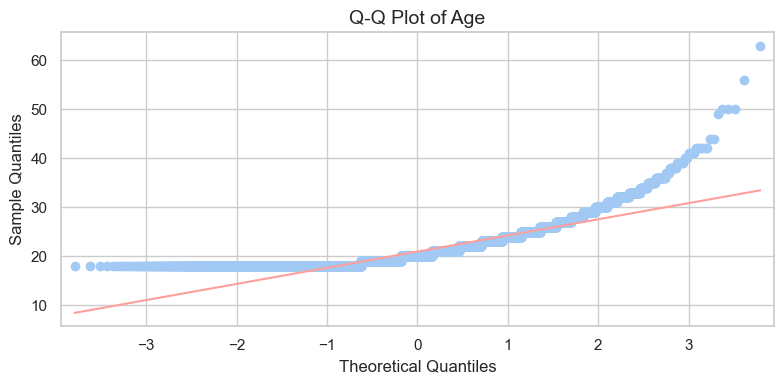

<Figure size 800x400 with 0 Axes>

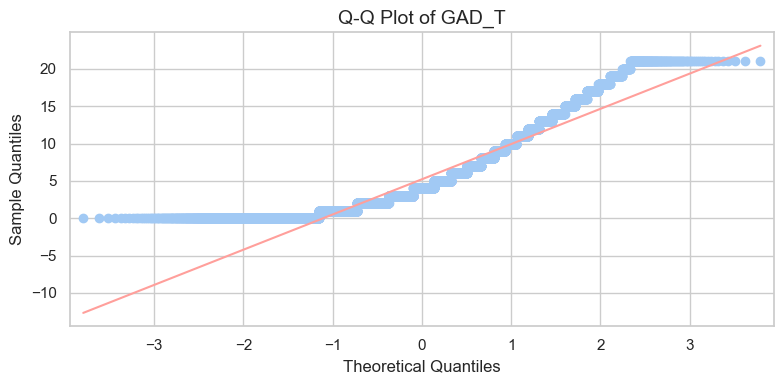

<Figure size 800x400 with 0 Axes>

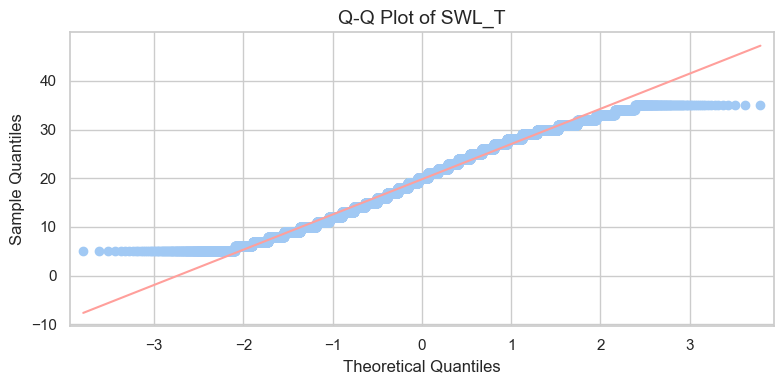

<Figure size 800x400 with 0 Axes>

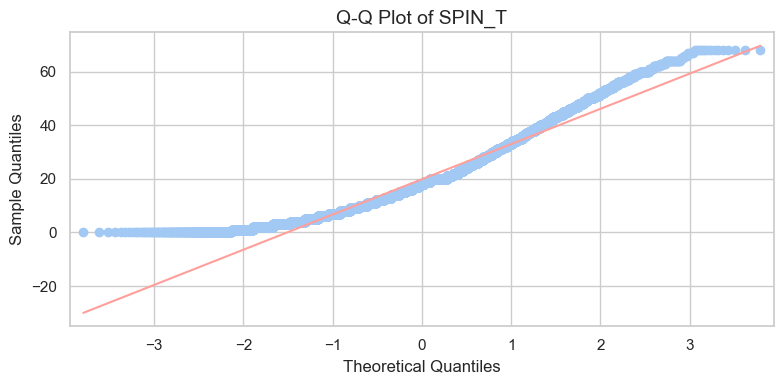


Feature scores (ANOVA F-test):
GAD1: 22839.54
GAD2: 29136.51
GAD3: 24652.31
GAD4: 19437.85
GAD5: 7003.50
GAD6: 8325.27
GAD7: 15745.52
GADE: 2076.33
SWL1: 1532.13
SWL2: 1420.06
SWL3: 2910.39
SWL4: 1185.36
SWL5: 1238.67
Game: 0.13
Platform: 0.00
Hours: 2.18
earnings: 32.30
whyplay: 109.93
League: 0.52
streams: 0.15
SPIN1: 804.91
SPIN2: 800.29
SPIN3: 1653.92
SPIN4: 949.41
SPIN5: 1786.62
SPIN6: 1928.04
SPIN7: 1160.10
SPIN8: 921.90
SPIN9: 1019.70
SPIN10: 1524.81
SPIN11: 561.56
SPIN12: 1546.07
SPIN13: 1894.79
SPIN14: 2274.53
SPIN15: 1795.87
SPIN16: 1335.76
SPIN17: 1601.04
Narcissism: 84.81
Gender: 134.82
Age: 23.19
Work: 141.43
Degree: 3.36
Birthplace: 14.86
Residence: 13.54
Reference: 3.44
Playstyle: 14.16
accept: 0.00
SWL_T: 2614.51
SPIN_T: 3280.54
Residence_ISO3: 4.80
Birthplace_ISO3: 7.76

Feature importance (Random Forest):
GAD6               0.080378
GAD3               0.068185
GAD1               0.060878
GAD4               0.051548
GAD5               0.045612
GAD2               0.042

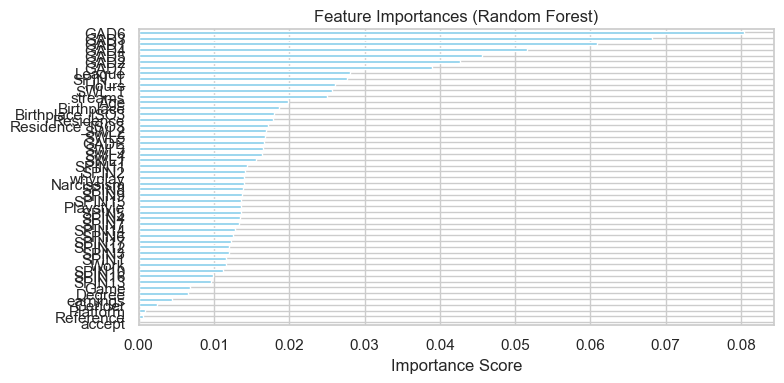

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (8, 4)

#  Distribution for Each Column (loop)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=20, color="skyblue", edgecolor="black")
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

for col in numerical_cols:
    plt.figure()
    sm.qqplot(df[col], line='s')
    plt.title(f"Q-Q Plot of {col}", fontsize=14)
    plt.tight_layout()
    plt.show()

df_encoded = df.copy()
label_encoders = {}
for col in df_encoded.select_dtypes(include='object'):
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

target = 'GAD_T'  # replace with actual target column name
X = df_encoded.drop(columns=[target])
y = df_encoded[target]

selector = SelectKBest(score_func=f_regression, k='all')
X_new = selector.fit_transform(X, y)
scores = selector.scores_

print("\nFeature scores (ANOVA F-test):")
for feature, score in zip(X.columns, scores):
    print(f"{feature}: {score:.2f}")

model = RandomForestClassifier()
model.fit(X, y)
importances = model.feature_importances_

feat_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print("\nFeature importance (Random Forest):")
print(feat_importance)

plt.figure()
feat_importance.plot(kind='barh', color='skyblue')
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# تأكد أن X يحتوي فقط على أعمدة عددية
X_numeric = X.select_dtypes(include=['int64', 'float64'])
X_const = add_constant(X_numeric)

vif_df = pd.DataFrame()
vif_df["Feature"] = X_numeric.columns
vif_df["VIF"] = [variance_inflation_factor(X_const.values, i+1) for i in range(X_numeric.shape[1])]

print("📊 Multicollinearity - VIF Table:")
print(vif_df.sort_values(by="VIF", ascending=False)) 

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


📊 Multicollinearity - VIF Table:
       Feature        VIF
9         SWL3        inf
7         SWL1        inf
11        SWL5        inf
33       SWL_T        inf
10        SWL4        inf
8         SWL2        inf
34      SPIN_T  30.764905
12       Hours  21.532556
13     streams  21.475688
1         GAD2   2.758481
16       SPIN3   2.690024
19       SPIN6   2.671297
27      SPIN14   2.619990
23      SPIN10   2.469781
28      SPIN15   2.400257
18       SPIN5   2.377575
25      SPIN12   2.357154
2         GAD3   2.351490
17       SPIN4   2.303891
22       SPIN9   2.296828
0         GAD1   2.177337
21       SPIN8   2.173414
30      SPIN17   2.040740
24      SPIN11   2.032151
29      SPIN16   1.892605
3         GAD4   1.860278
26      SPIN13   1.781982
20       SPIN7   1.728588
6         GAD7   1.720452
15       SPIN2   1.660165
14       SPIN1   1.536437
5         GAD6   1.368628
4         GAD5   1.296937
32         Age   1.051457
31  Narcissism   1.048050


In [46]:
# DROP THE HIGH VIF 
high_vif_features = [
    'SPIN_T',
    'Hours',
    'streams',
    'Birthplace_ISO3',
    'Residence_ISO3',
    'Birthplace',
    'Residence'
]

X_filtered = X.drop(columns=high_vif_features)

from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_const = add_constant(X_filtered.select_dtypes(include=['int64', 'float64']))
vif_df = pd.DataFrame()
vif_df["Feature"] = X_filtered.select_dtypes(include=['int64', 'float64']).columns
vif_df["VIF"] = [variance_inflation_factor(X_const.values, i+1) for i in range(X_filtered.select_dtypes(include=['int64', 'float64']).shape[1])]
print(vif_df.sort_values(by="VIF", ascending=False))


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


       Feature       VIF
33       SWL_T       inf
9         SWL1       inf
13        SWL5       inf
12        SWL4       inf
11        SWL3       inf
10        SWL2       inf
3         GAD2  2.653670
16       SPIN3  2.442277
0    ï»¿S. No.  2.408176
1    Timestamp  2.404039
19       SPIN6  2.384957
27      SPIN14  2.333363
4         GAD3  2.268665
23      SPIN10  2.266769
18       SPIN5  2.103840
25      SPIN12  2.096958
17       SPIN4  2.089644
28      SPIN15  2.075611
2         GAD1  2.059941
22       SPIN9  1.984725
21       SPIN8  1.855392
5         GAD4  1.789975
30      SPIN17  1.746856
29      SPIN16  1.734121
8         GAD7  1.634463
24      SPIN11  1.630829
26      SPIN13  1.608382
20       SPIN7  1.483073
15       SPIN2  1.438585
14       SPIN1  1.406319
7         GAD6  1.319023
6         GAD5  1.259147
31  Narcissism  1.052727
32         Age  1.049596


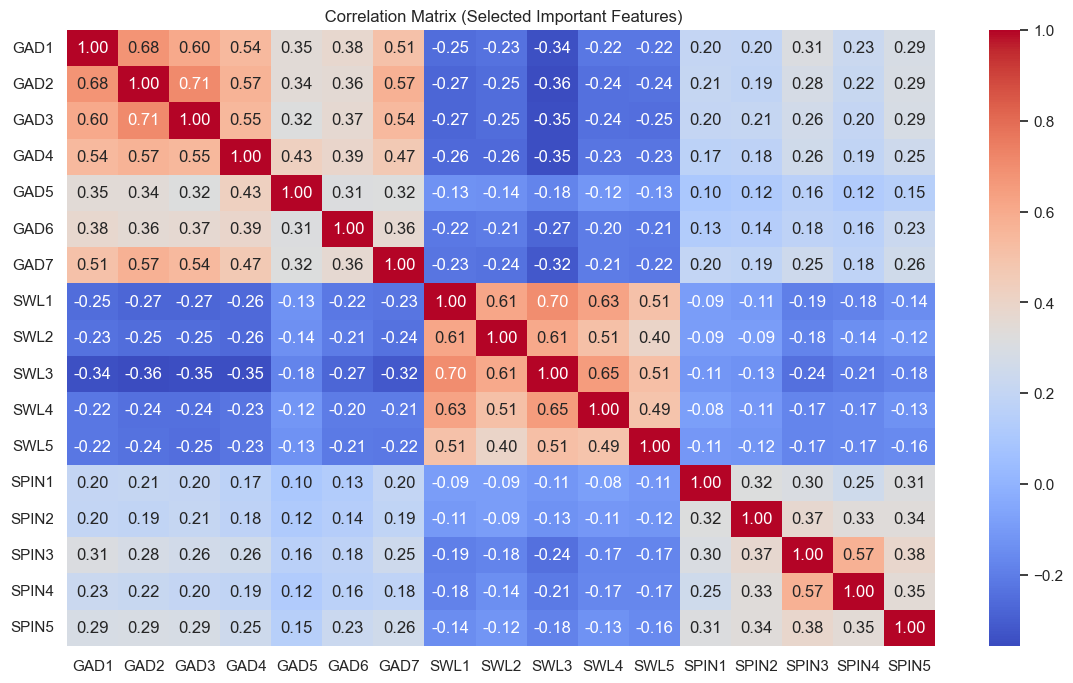

VIF (Important Features Only):
   Feature       VIF
1     GAD2  2.746977
9     SWL3  2.691394
7     SWL1  2.449361
2     GAD3  2.332323
0     GAD1  2.164678
10    SWL4  2.024909
3     GAD4  1.850808
8     SWL2  1.814587
14   SPIN3  1.718961
6     GAD7  1.703935
15   SPIN4  1.574723
11    SWL5  1.512628
16   SPIN5  1.363086
5     GAD6  1.328767
13   SPIN2  1.296827
4     GAD5  1.291598
12   SPIN1  1.219946


In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

important_features = [
    'GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7',
    'SWL1', 'SWL2', 'SWL3', 'SWL4', 'SWL5',
    'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5'
]

X_important = df[important_features]

plt.figure(figsize=(14, 8))
sns.heatmap(X_important.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title(" Correlation Matrix (Selected Important Features)")
plt.show()

X_const = add_constant(X_important)
vif_df = pd.DataFrame()
vif_df["Feature"] = X_important.columns
vif_df["VIF"] = [variance_inflation_factor(X_const.values, i + 1) for i in range(X_important.shape[1])]

print("VIF (Important Features Only):")
print(vif_df.sort_values("VIF", ascending=False))


In [48]:
X_final = df.drop(columns=["GAD_T"])
y_final = df["GAD_T"]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       324
           1       0.69      0.69      0.69       286
           2       0.41      0.65      0.50       326
           3       0.26      0.32      0.29       308
           4       0.14      0.13      0.13       262
           5       0.16      0.21      0.18       200
           6       0.11      0.14      0.13       151
           7       0.09      0.10      0.09       136
           8       0.06      0.02      0.03       131
           9       0.00      0.00      0.00       104
          10       0.17      0.06      0.09        80
          11       0.08      0.03      0.04        77
          12       0.10      0.07      0.08        57
          13       0.12      0.11      0.11        55
          14       0.19      0.11      0.14        47
          15       0.14      0.08      0.10        38
          16       0.17      0.07  

C:\Users\احمد\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [12:28:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       324
           1       0.97      0.99      0.98       286
           2       0.93      0.97      0.95       326
           3       0.85      0.88      0.87       308
           4       0.69      0.67      0.68       262
           5       0.50      0.57      0.53       200
           6       0.58      0.55      0.56       151
           7       0.36      0.37      0.36       136
           8       0.32      0.31      0.31       131
           9       0.25      0.21      0.23       104
          10       0.32      0.30      0.31        80
          11       0.28      0.23      0.26        77
          12       0.14      0.14      0.14        57
          13       0.33      0.35      0.34        55
          14       0.27      0.28      0.27        47
          15       0.38      0.32      0.34        38
          16       0.21      0.19      0.20    

C:\Users\احمد\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [12:28:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🗳️ Voting Classifier - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       324
           1       0.96      0.99      0.98       286
           2       0.90      0.97      0.93       326
           3       0.86      0.88      0.87       308
           4       0.71      0.68      0.69       262
           5       0.52      0.61      0.56       200
           6       0.58      0.54      0.56       151
           7       0.36      0.38      0.37       136
           8       0.32      0.30      0.31       131
           9       0.25      0.20      0.22       104
          10       0.33      0.30      0.32        80
          11       0.28      0.23      0.25        77
          12       0.16      0.16      0.16        57
          13       0.32      0.36      0.34        55
          14       0.28      0.30      0.29        47
          15       0.39      0.32      0.35        38
          16       0.29      0.22 

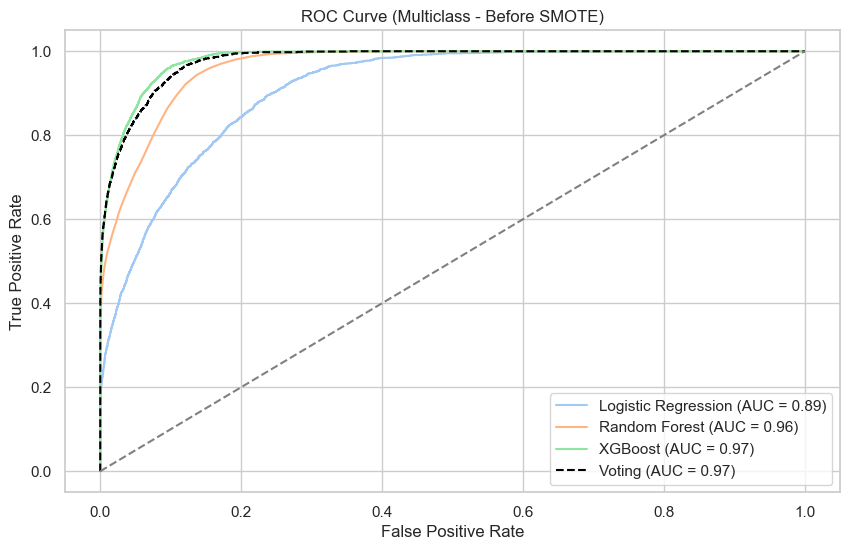

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score

X_final = df.drop(columns=["GAD_T"])
y_final = df["GAD_T"]

y_final = df["GAD_T"] 

X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42, multi_class='ovr'),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

results = {}
probabilities = {}

y_test_bin = label_binarize(y_test, classes=sorted(set(y_test)))  

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)
    
    auc = roc_auc_score(y_test_bin, y_prob, multi_class='ovr')
    acc = accuracy_score(y_test, y_pred)

    print(f"\n{name} - Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    print(f"AUC: {auc:.3f}")

    results[name] = {"auc": auc, "accuracy": acc}
    probabilities[name] = y_prob

top_models = sorted(results.items(), key=lambda x: x[1]['auc'], reverse=True)[:2]
print("\n Top 2 Models:")
for name, metrics in top_models:
    print(f"{name}: AUC = {metrics['auc']:.3f}, Accuracy = {metrics['accuracy']:.3f}")

voting_model = VotingClassifier(
    estimators=[(name, models[name]) for name, _ in top_models],
    voting='soft'
)
voting_model.fit(X_train_scaled, y_train)
y_pred_vote = voting_model.predict(X_test_scaled)
y_prob_vote = voting_model.predict_proba(X_test_scaled)

auc_vote = roc_auc_score(y_test_bin, y_prob_vote, multi_class='ovr')
print("\n🗳️ Voting Classifier - Classification Report:")
print(classification_report(y_test, y_pred_vote, zero_division=0))
print(f"AUC: {auc_vote:.3f}")

#  ROC Plot (Multiclass)
plt.figure(figsize=(10, 6))
for name, probs in probabilities.items():
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), probs.ravel())
    auc = results[name]["auc"]
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

fpr_vote, tpr_vote, _ = roc_curve(y_test_bin.ravel(), y_prob_vote.ravel())
plt.plot(fpr_vote, tpr_vote, label=f"Voting (AUC = {auc_vote:.2f})", linestyle='--', color='black')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve (Multiclass - Before SMOTE)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()



================ BEFORE SMOTE =================


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



📋 Before SMOTE - Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       324
           1       0.69      0.69      0.69       286
           2       0.41      0.65      0.50       326
           3       0.26      0.32      0.29       308
           4       0.14      0.13      0.13       262
           5       0.16      0.21      0.18       200
           6       0.11      0.14      0.13       151
           7       0.09      0.10      0.09       136
           8       0.06      0.02      0.03       131
           9       0.00      0.00      0.00       104
          10       0.17      0.06      0.09        80
          11       0.08      0.03      0.04        77
          12       0.10      0.07      0.08        57
          13       0.12      0.11      0.11        55
          14       0.19      0.11      0.14        47
          15       0.14      0.08      0.10        38
          16       0.17      0.07  

C:\Users\احمد\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [12:49:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📋 Before SMOTE - XGBoost Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       324
           1       0.97      0.99      0.98       286
           2       0.93      0.97      0.95       326
           3       0.85      0.88      0.87       308
           4       0.69      0.67      0.68       262
           5       0.50      0.57      0.53       200
           6       0.58      0.55      0.56       151
           7       0.36      0.37      0.36       136
           8       0.32      0.31      0.31       131
           9       0.25      0.21      0.23       104
          10       0.32      0.30      0.31        80
          11       0.28      0.23      0.26        77
          12       0.14      0.14      0.14        57
          13       0.33      0.35      0.34        55
          14       0.27      0.28      0.27        47
          15       0.38      0.32      0.34        38
          16       0.21      0.19      0.20    

C:\Users\احمد\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [12:49:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 Before SMOTE - Voting Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       324
           1       0.96      0.99      0.98       286
           2       0.90      0.97      0.93       326
           3       0.86      0.88      0.87       308
           4       0.71      0.68      0.69       262
           5       0.52      0.61      0.56       200
           6       0.58      0.54      0.56       151
           7       0.36      0.38      0.37       136
           8       0.32      0.30      0.31       131
           9       0.25      0.20      0.22       104
          10       0.33      0.30      0.32        80
          11       0.28      0.23      0.25        77
          12       0.16      0.16      0.16        57
          13       0.32      0.36      0.34        55
          14       0.28      0.30      0.29        47
          15       0.39      0.32      0.35        38
          16       0.29      0.22      0.25      

C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")



================ AFTER SMOTE =================


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



📋 After SMOTE - Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       324
           1       0.67      0.74      0.70       286
           2       0.49      0.40      0.44       326
           3       0.34      0.23      0.27       308
           4       0.18      0.15      0.16       262
           5       0.14      0.10      0.12       200
           6       0.11      0.13      0.12       151
           7       0.13      0.15      0.14       136
           8       0.14      0.10      0.12       131
           9       0.14      0.15      0.15       104
          10       0.08      0.11      0.10        80
          11       0.09      0.09      0.09        77
          12       0.09      0.14      0.11        57
          13       0.08      0.13      0.10        55
          14       0.12      0.17      0.14        47
          15       0.09      0.18      0.12        38
          16       0.12      0.22   

C:\Users\احمد\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [12:49:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📋 After SMOTE - XGBoost Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       324
           1       0.96      1.00      0.98       286
           2       0.94      0.97      0.96       326
           3       0.85      0.88      0.87       308
           4       0.72      0.70      0.71       262
           5       0.53      0.61      0.57       200
           6       0.52      0.51      0.52       151
           7       0.46      0.46      0.46       136
           8       0.35      0.34      0.34       131
           9       0.29      0.21      0.25       104
          10       0.34      0.39      0.36        80
          11       0.23      0.23      0.23        77
          12       0.17      0.14      0.16        57
          13       0.27      0.31      0.29        55
          14       0.31      0.28      0.29        47
          15       0.52      0.32      0.39        38
          16       0.31      0.33      0.32     

C:\Users\احمد\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [12:50:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 After SMOTE - Voting Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       324
           1       0.96      1.00      0.98       286
           2       0.92      0.97      0.95       326
           3       0.84      0.88      0.86       308
           4       0.71      0.70      0.71       262
           5       0.54      0.61      0.57       200
           6       0.54      0.53      0.54       151
           7       0.46      0.44      0.45       136
           8       0.33      0.31      0.32       131
           9       0.27      0.20      0.23       104
          10       0.32      0.34      0.33        80
          11       0.26      0.26      0.26        77
          12       0.20      0.16      0.17        57
          13       0.28      0.29      0.29        55
          14       0.30      0.28      0.29        47
          15       0.46      0.29      0.35        38
          16       0.27      0.30      0.28       

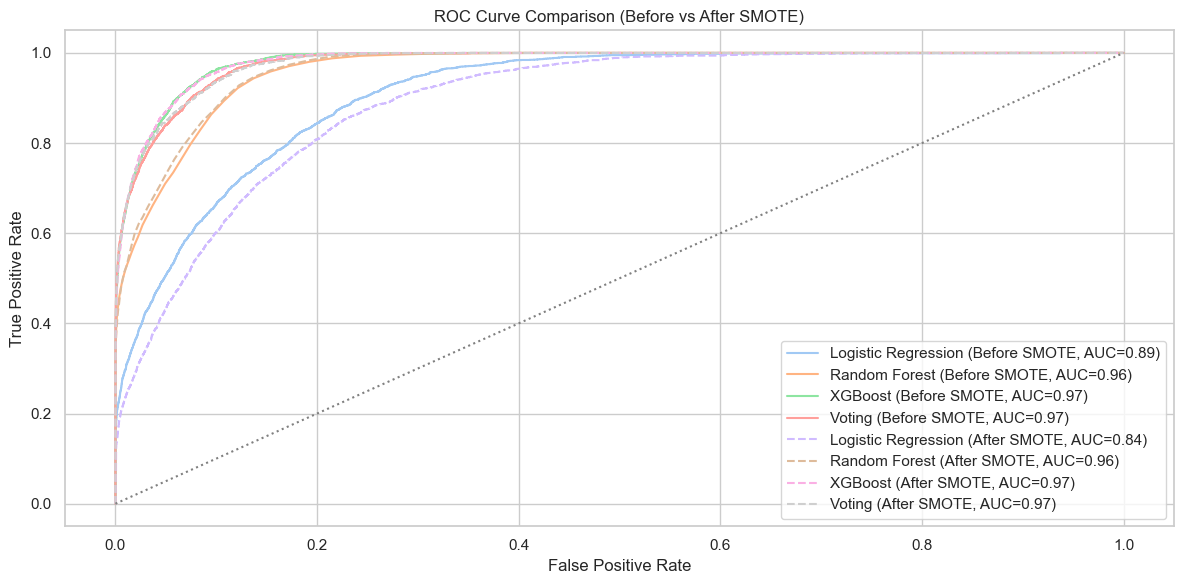

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score
from imblearn.over_sampling import SMOTE

X_final = df.drop(columns=["GAD_T"])
y_final = df["GAD_T"]  # Target: multiclass (0–21)

X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_test_bin = label_binarize(y_test, classes=sorted(set(y_final)))

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, multi_class='ovr', random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

def evaluate_models(X_train, y_train, label=""):
    results = {}
    probs = {}
    top_models = []

    print(f"\n================ {label.upper()} =================")
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test_scaled)
        y_prob = model.predict_proba(X_test_scaled)

        auc = roc_auc_score(y_test_bin, y_prob, multi_class='ovr')
        acc = accuracy_score(y_test, y_pred)

        print(f"\n📋 {label} - {name} Report:")
        print(classification_report(y_test, y_pred, zero_division=0))
        print(f"AUC: {auc:.3f}")

        results[name] = {"auc": auc, "accuracy": acc}
        probs[name] = y_prob

    top_models = sorted(results.items(), key=lambda x: x[1]['auc'], reverse=True)[:2]
    print(f"\n Top 2 ({label}):")
    for name, score in top_models:
        print(f"{name} - AUC: {score['auc']:.3f}, Acc: {score['accuracy']:.3f}")

    voting = VotingClassifier(
        estimators=[(name, models[name]) for name, _ in top_models],
        voting='soft'
    )
    voting.fit(X_train, y_train)
    y_pred_vote = voting.predict(X_test_scaled)
    y_prob_vote = voting.predict_proba(X_test_scaled)

    auc_vote = roc_auc_score(y_test_bin, y_prob_vote, multi_class='ovr')
    print(f"\n {label} - Voting Report:")
    print(classification_report(y_test, y_pred_vote, zero_division=0))
    print(f"AUC: {auc_vote:.3f}")

    # Save all probs for ROC
    probs["Voting"] = y_prob_vote
    results["Voting"] = {"auc": auc_vote}

    return results, probs

#  Evaluate Before SMOTE 
results_before, probs_before = evaluate_models(X_train_scaled, y_train, label="Before SMOTE")

# Apply SMOTE 
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

#  Evaluate After SMOTE 
results_after, probs_after = evaluate_models(X_train_smote, y_train_smote, label="After SMOTE")

#  ROC Comparison Plot 
plt.figure(figsize=(12, 6))

for name, probs in probs_before.items():
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), probs.ravel())
    plt.plot(fpr, tpr, linestyle='-', label=f"{name} (Before SMOTE, AUC={results_before[name]['auc']:.2f})")

for name, probs in probs_after.items():
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), probs.ravel())
    plt.plot(fpr, tpr, linestyle='--', label=f"{name} (After SMOTE, AUC={results_after[name]['auc']:.2f})")

plt.plot([0, 1], [0, 1], linestyle=':', color='gray')
plt.title("ROC Curve Comparison (Before vs After SMOTE)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [50]:
import joblib
joblib.dump(xgb_model, 'xgb_model.pkl')
joblib.dump(voting_model, 'voting_model.pkl')
joblib.dump(rf_model, 'rf_model.pkl')


['rf_model.pkl']

In [54]:
import joblib
joblib.dump(xgb_model, "xgb_model.pkl")
joblib.dump(rf_model, "rf_model.pkl")


['rf_model.pkl']